In [1]:
import pandas as pd
from scipy.io import arff
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arff_file = arff.loadarff('dataset_31_credit-g.arff')

In [3]:
df = pd.DataFrame(arff_file[0])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [5]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [6]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [8]:
print(df.isna().sum())

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
columns = df.columns

for col in columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts(), '\n')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # set as NaN

checking_status
b'no checking'    394
b'<0'             274
b'0<=X<200'       269
b'>=200'           63
Name: count, dtype: int64 

credit_history
b'existing paid'                     530
b'critical/other existing credit'    293
b'delayed previously'                 88
b'all paid'                           49
b'no credits/all paid'                40
Name: count, dtype: int64 

purpose
b'radio/tv'               280
b'new car'                234
b'furniture/equipment'    181
b'used car'               103
b'business'                97
b'education'               50
b'repairs'                 22
b'domestic appliance'      12
b'other'                   12
b'retraining'               9
Name: count, dtype: int64 

savings_status
b'<100'                603
b'no known savings'    183
b'100<=X<500'          103
b'500<=X<1000'          63
b'>=1000'               48
Name: count, dtype: int64 

employment
b'1<=X<4'        339
b'>=7'           253
b'4<=X<7'        174
b'<1'            172
b'unemploye

In [11]:
cat_features = df.select_dtypes(include=['object']).columns
num_features = df.select_dtypes(include=[np.number]).columns

In [12]:
for cat in cat_features:
    # Create a contingency table
    contingency = pd.crosstab(df[cat], df['class'])

    # Run chi-square test
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency)

    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Degrees of freedom: {dof}")

    # Interpretation
    if p_val < 0.05:
        print(f"Significant association exists between {cat} and class \n")
    else:
        print(f"No significant association between {cat} and class \n")
    

Chi-square statistic: 123.7209
p-value: 0.0000
Degrees of freedom: 3
Significant association exists between checking_status and class 

Chi-square statistic: 61.6914
p-value: 0.0000
Degrees of freedom: 4
Significant association exists between credit_history and class 

Chi-square statistic: 33.3564
p-value: 0.0001
Degrees of freedom: 9
Significant association exists between purpose and class 

Chi-square statistic: 36.0989
p-value: 0.0000
Degrees of freedom: 4
Significant association exists between savings_status and class 

Chi-square statistic: 18.3683
p-value: 0.0010
Degrees of freedom: 4
Significant association exists between employment and class 

Chi-square statistic: 9.6052
p-value: 0.0222
Degrees of freedom: 3
Significant association exists between personal_status and class 

Chi-square statistic: 6.6454
p-value: 0.0361
Degrees of freedom: 2
Significant association exists between other_parties and class 

Chi-square statistic: 23.7196
p-value: 0.0000
Degrees of freedom: 3
Signi

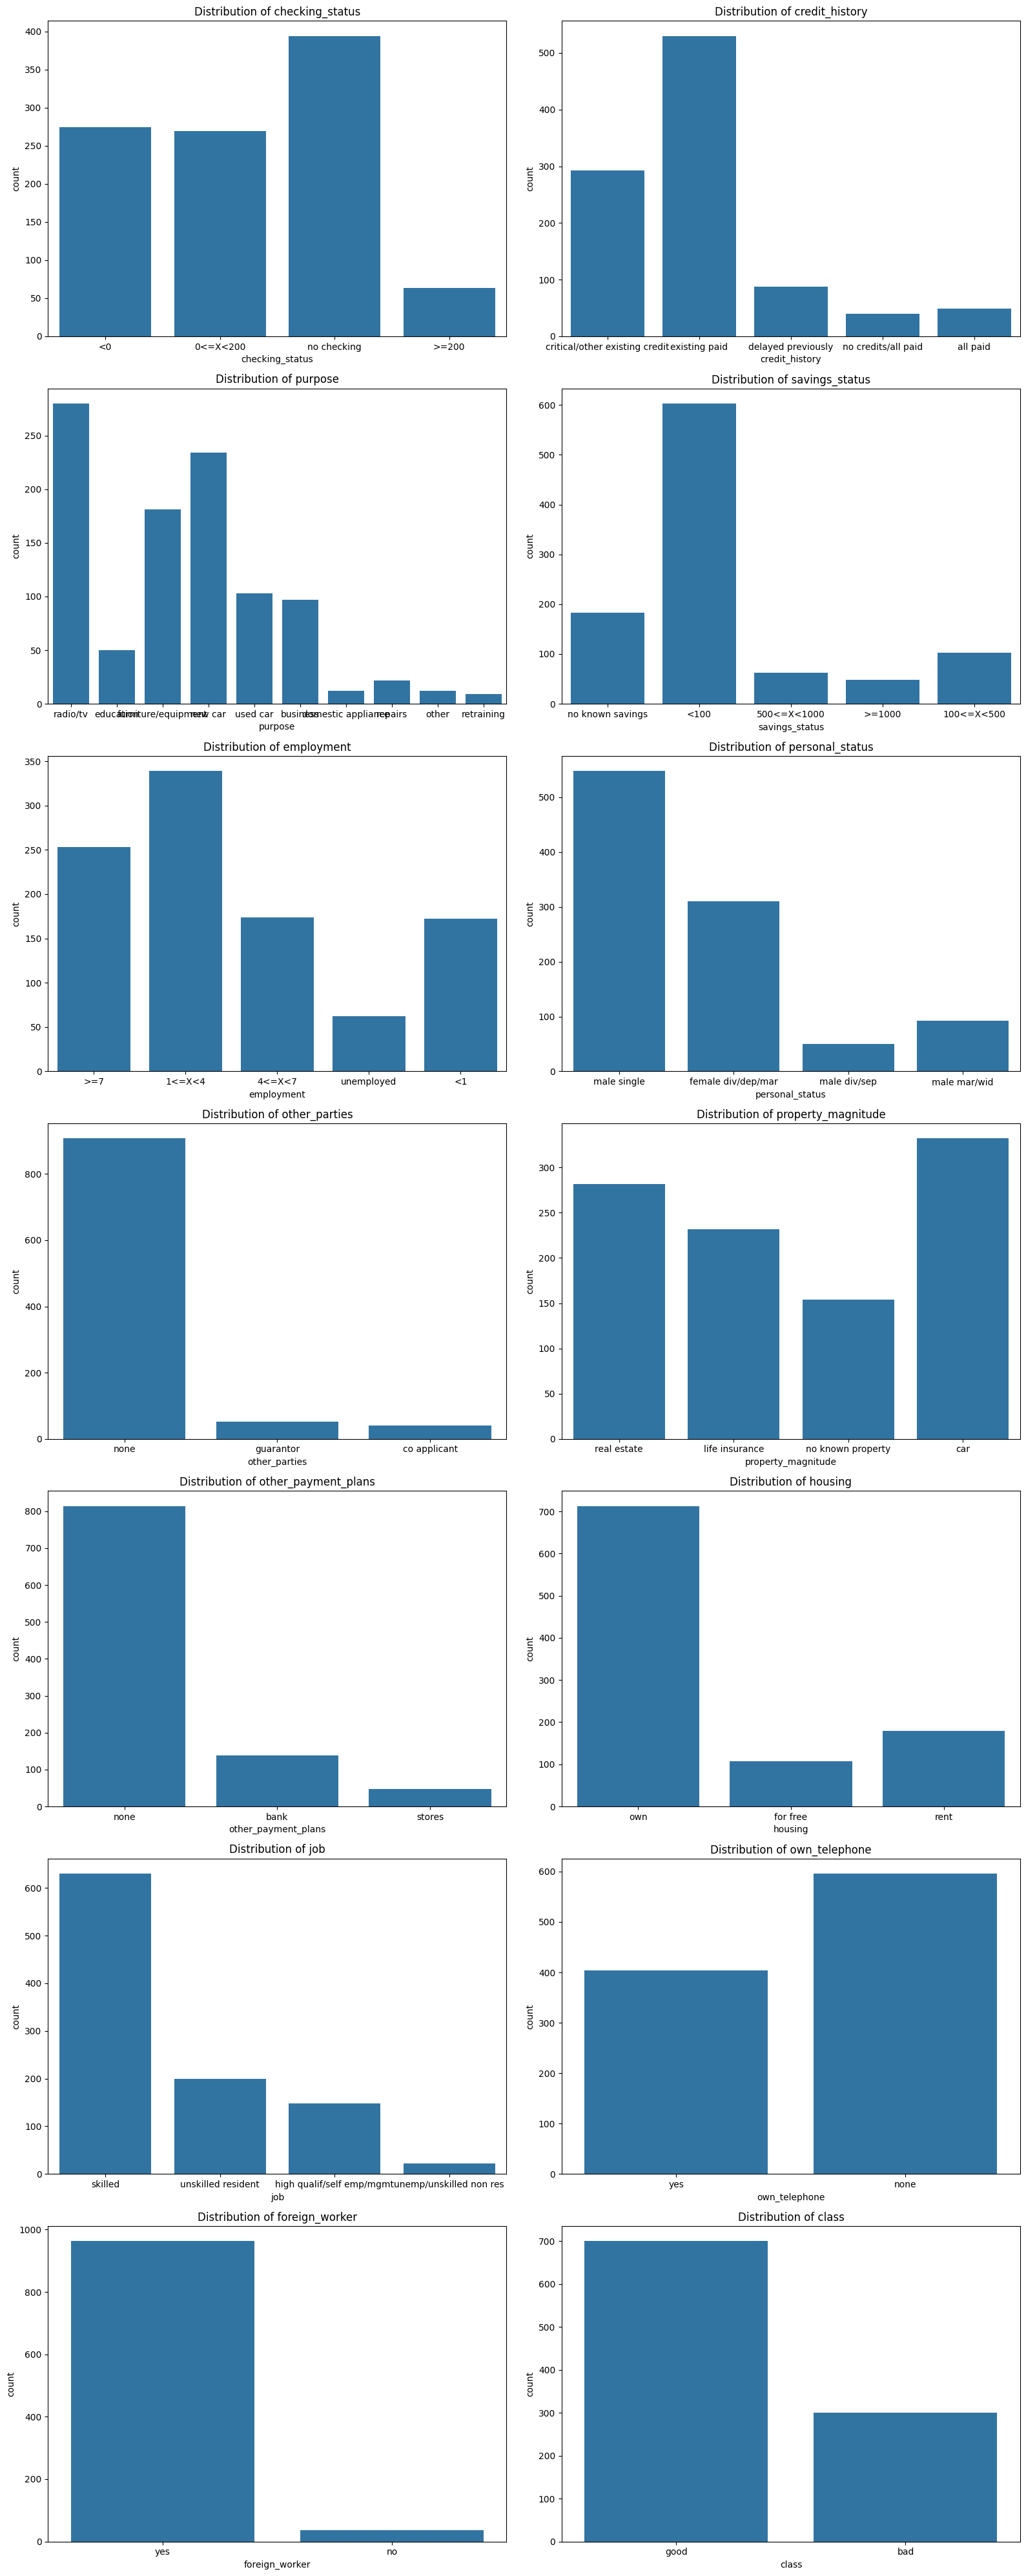

In [13]:
n_graphs_per_row = 2
if cat_features.shape[0] <= n_graphs_per_row:
    fig, axes = plt.subplots(1, cat_features.shape[0], figsize=(5*cat_features.shape[0], 5))
else:
    fig, axes = plt.subplots(cat_features.shape[0] // n_graphs_per_row, n_graphs_per_row,
                             figsize=(16, 5*(1 + cat_features.shape[0] // n_graphs_per_row)))

for idx_axis, col in enumerate(cat_features):
    # Plot feature distribution
    i, j = idx_axis // n_graphs_per_row, idx_axis % n_graphs_per_row
    sns.countplot(data=df, x=col, ax=axes[i, j])
    axes[i, j].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

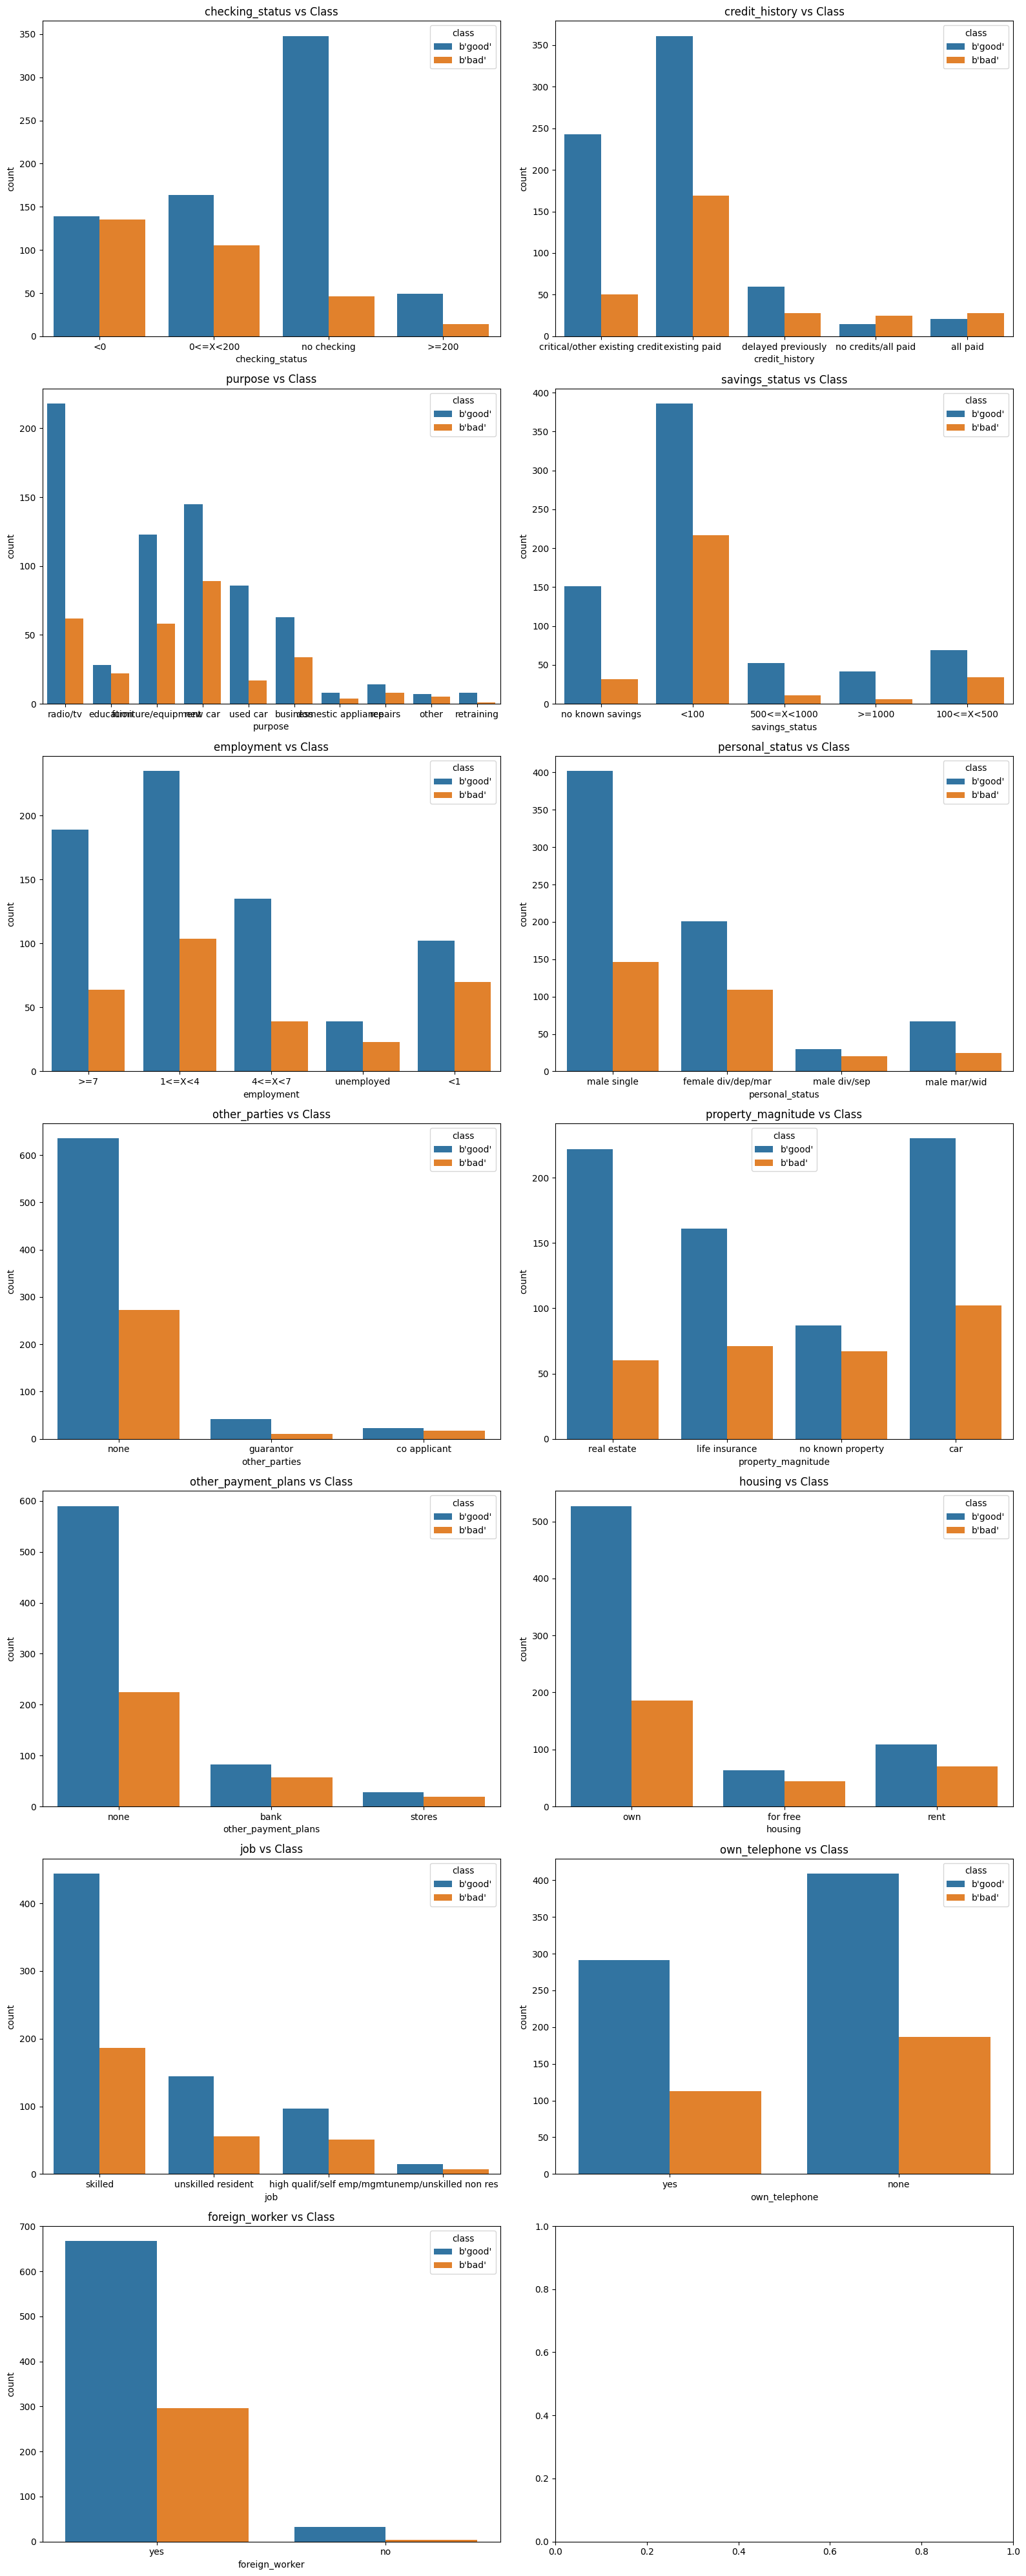

In [14]:
n_graphs_per_row = 2
if cat_features.shape[0] <= n_graphs_per_row:
    fig, axes = plt.subplots(1, cat_features.shape[0], figsize=(5*cat_features.shape[0], 5))
else:
    fig, axes = plt.subplots(cat_features.shape[0] // n_graphs_per_row, n_graphs_per_row,
                             figsize=(16, 5*(1 + cat_features.shape[0] // n_graphs_per_row)))

for idx_axis, col in enumerate(cat_features):
    # Plot feature distribution
    i, j = idx_axis // n_graphs_per_row, idx_axis % n_graphs_per_row
    
    if col.lower() == 'class':
        continue
    
    sns.countplot(data=df, x=col, hue='class', ax=axes[i, j])
    # sns.barplot(data=df, x=col, y='class', ax=axes[i, j])
    axes[i, j].set_title(f'{col} vs Class')

plt.tight_layout()
plt.show()

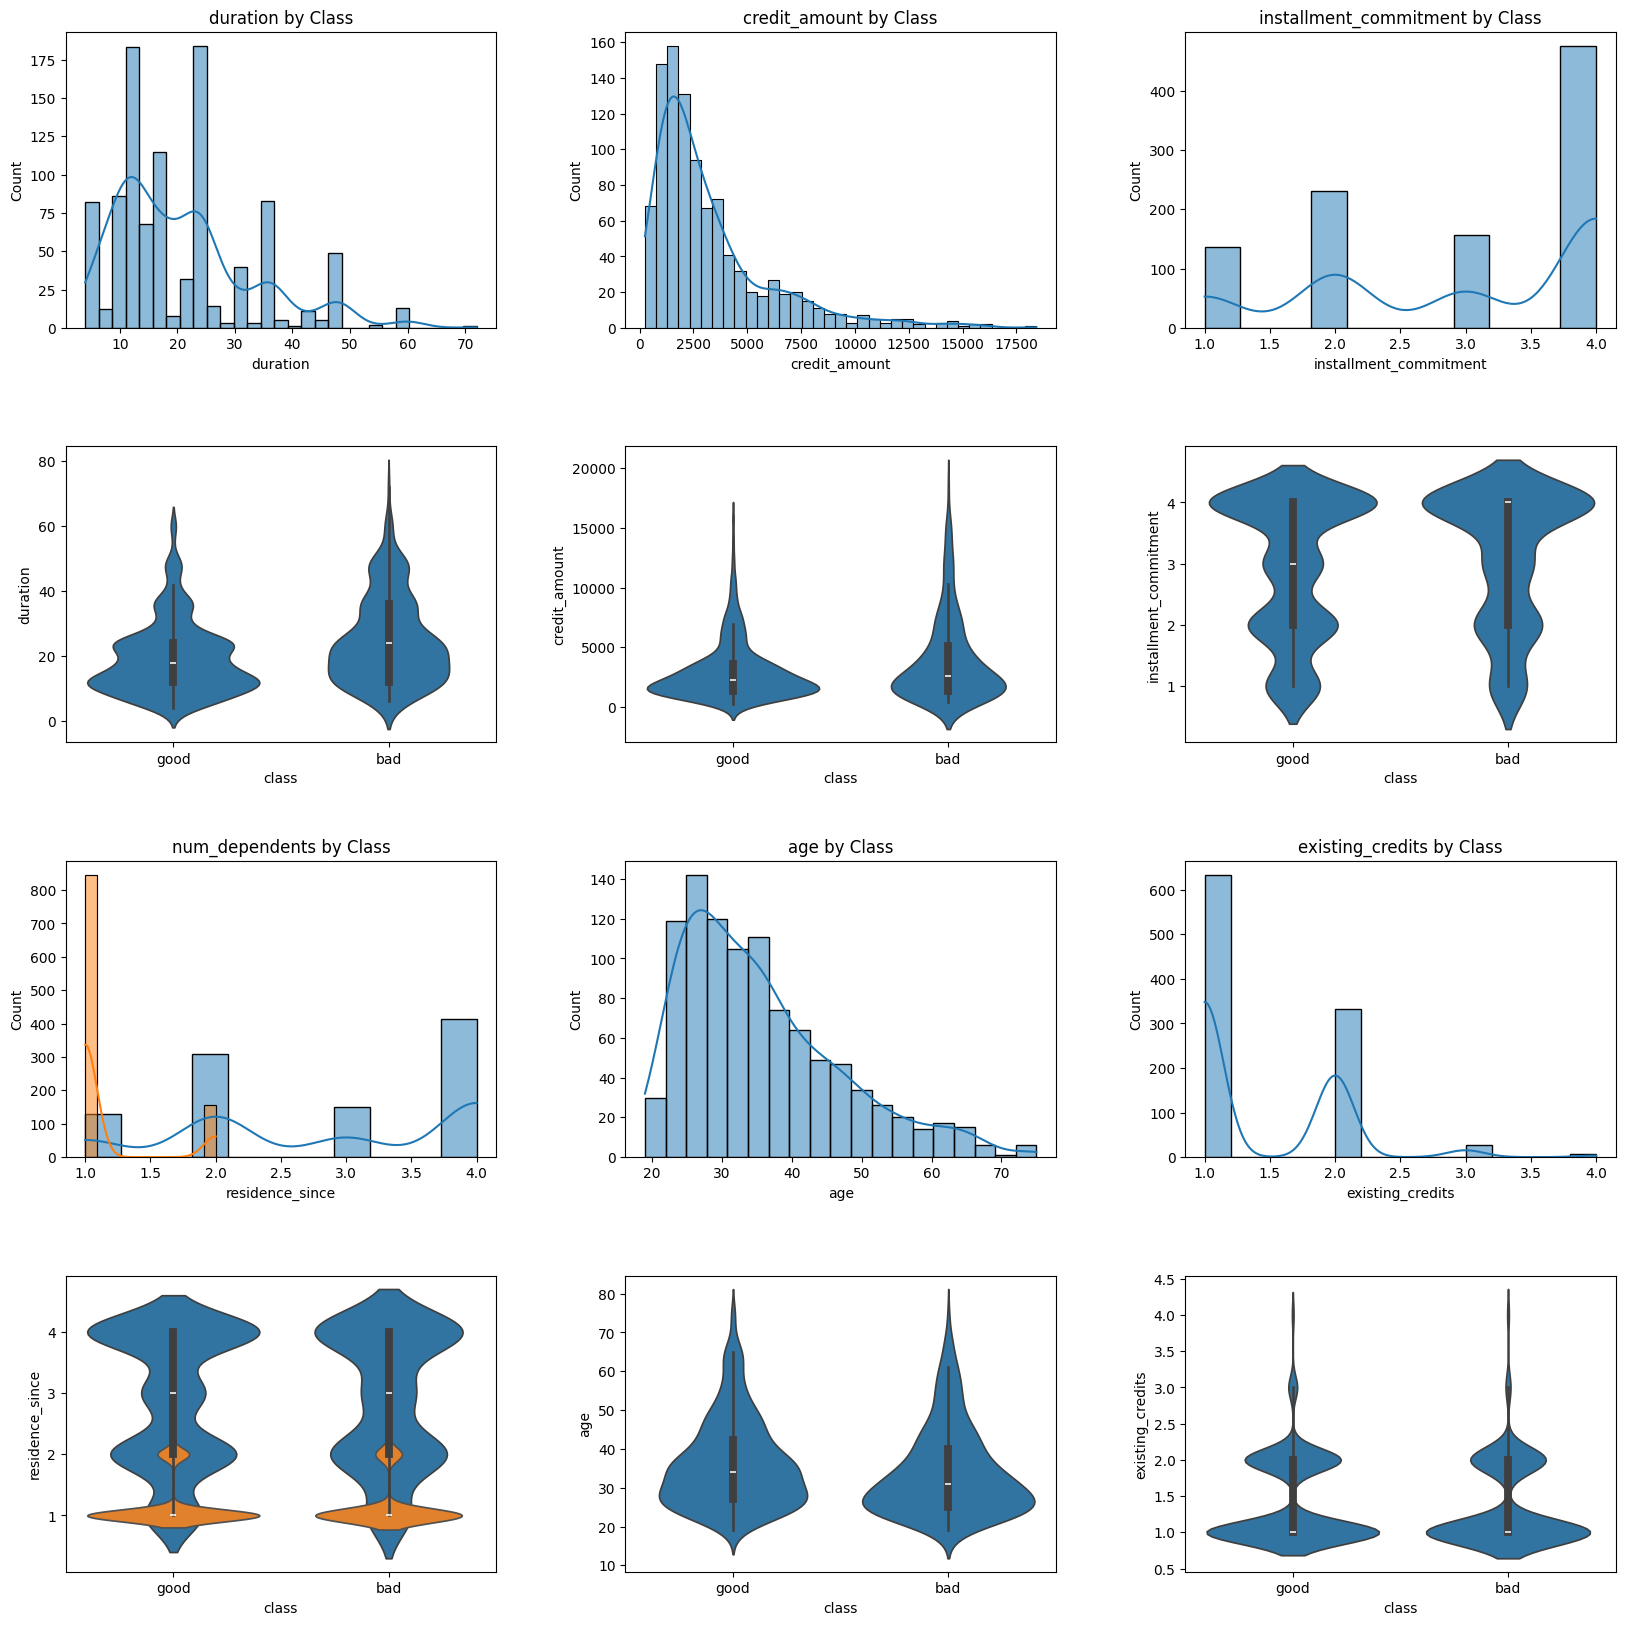

In [15]:
# Select numerical features for analysis
n = len(num_features)

# Create subplot grid
fig, axes = plt.subplots(4, int(n/2), figsize=(20, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Univariate and Bivariate Analysis
for i, feature in enumerate(num_features):
    # Univariate analysis (top row)
    sns.histplot(df[feature], ax=axes[0+int(i>2)*2, i%3], kde=True)
    axes[0+int(i>2)*2, i%3].set_title(f'Distribution of {feature}')
    
    # Bivariate analysis (bottom row)
    sns.violinplot(x='class', y=feature, data=df, ax=axes[1+int(i>2)*2, i%3])
    axes[0+int(i>2)*2, i%3].set_title(f'{feature} by Class')
    
plt.show()

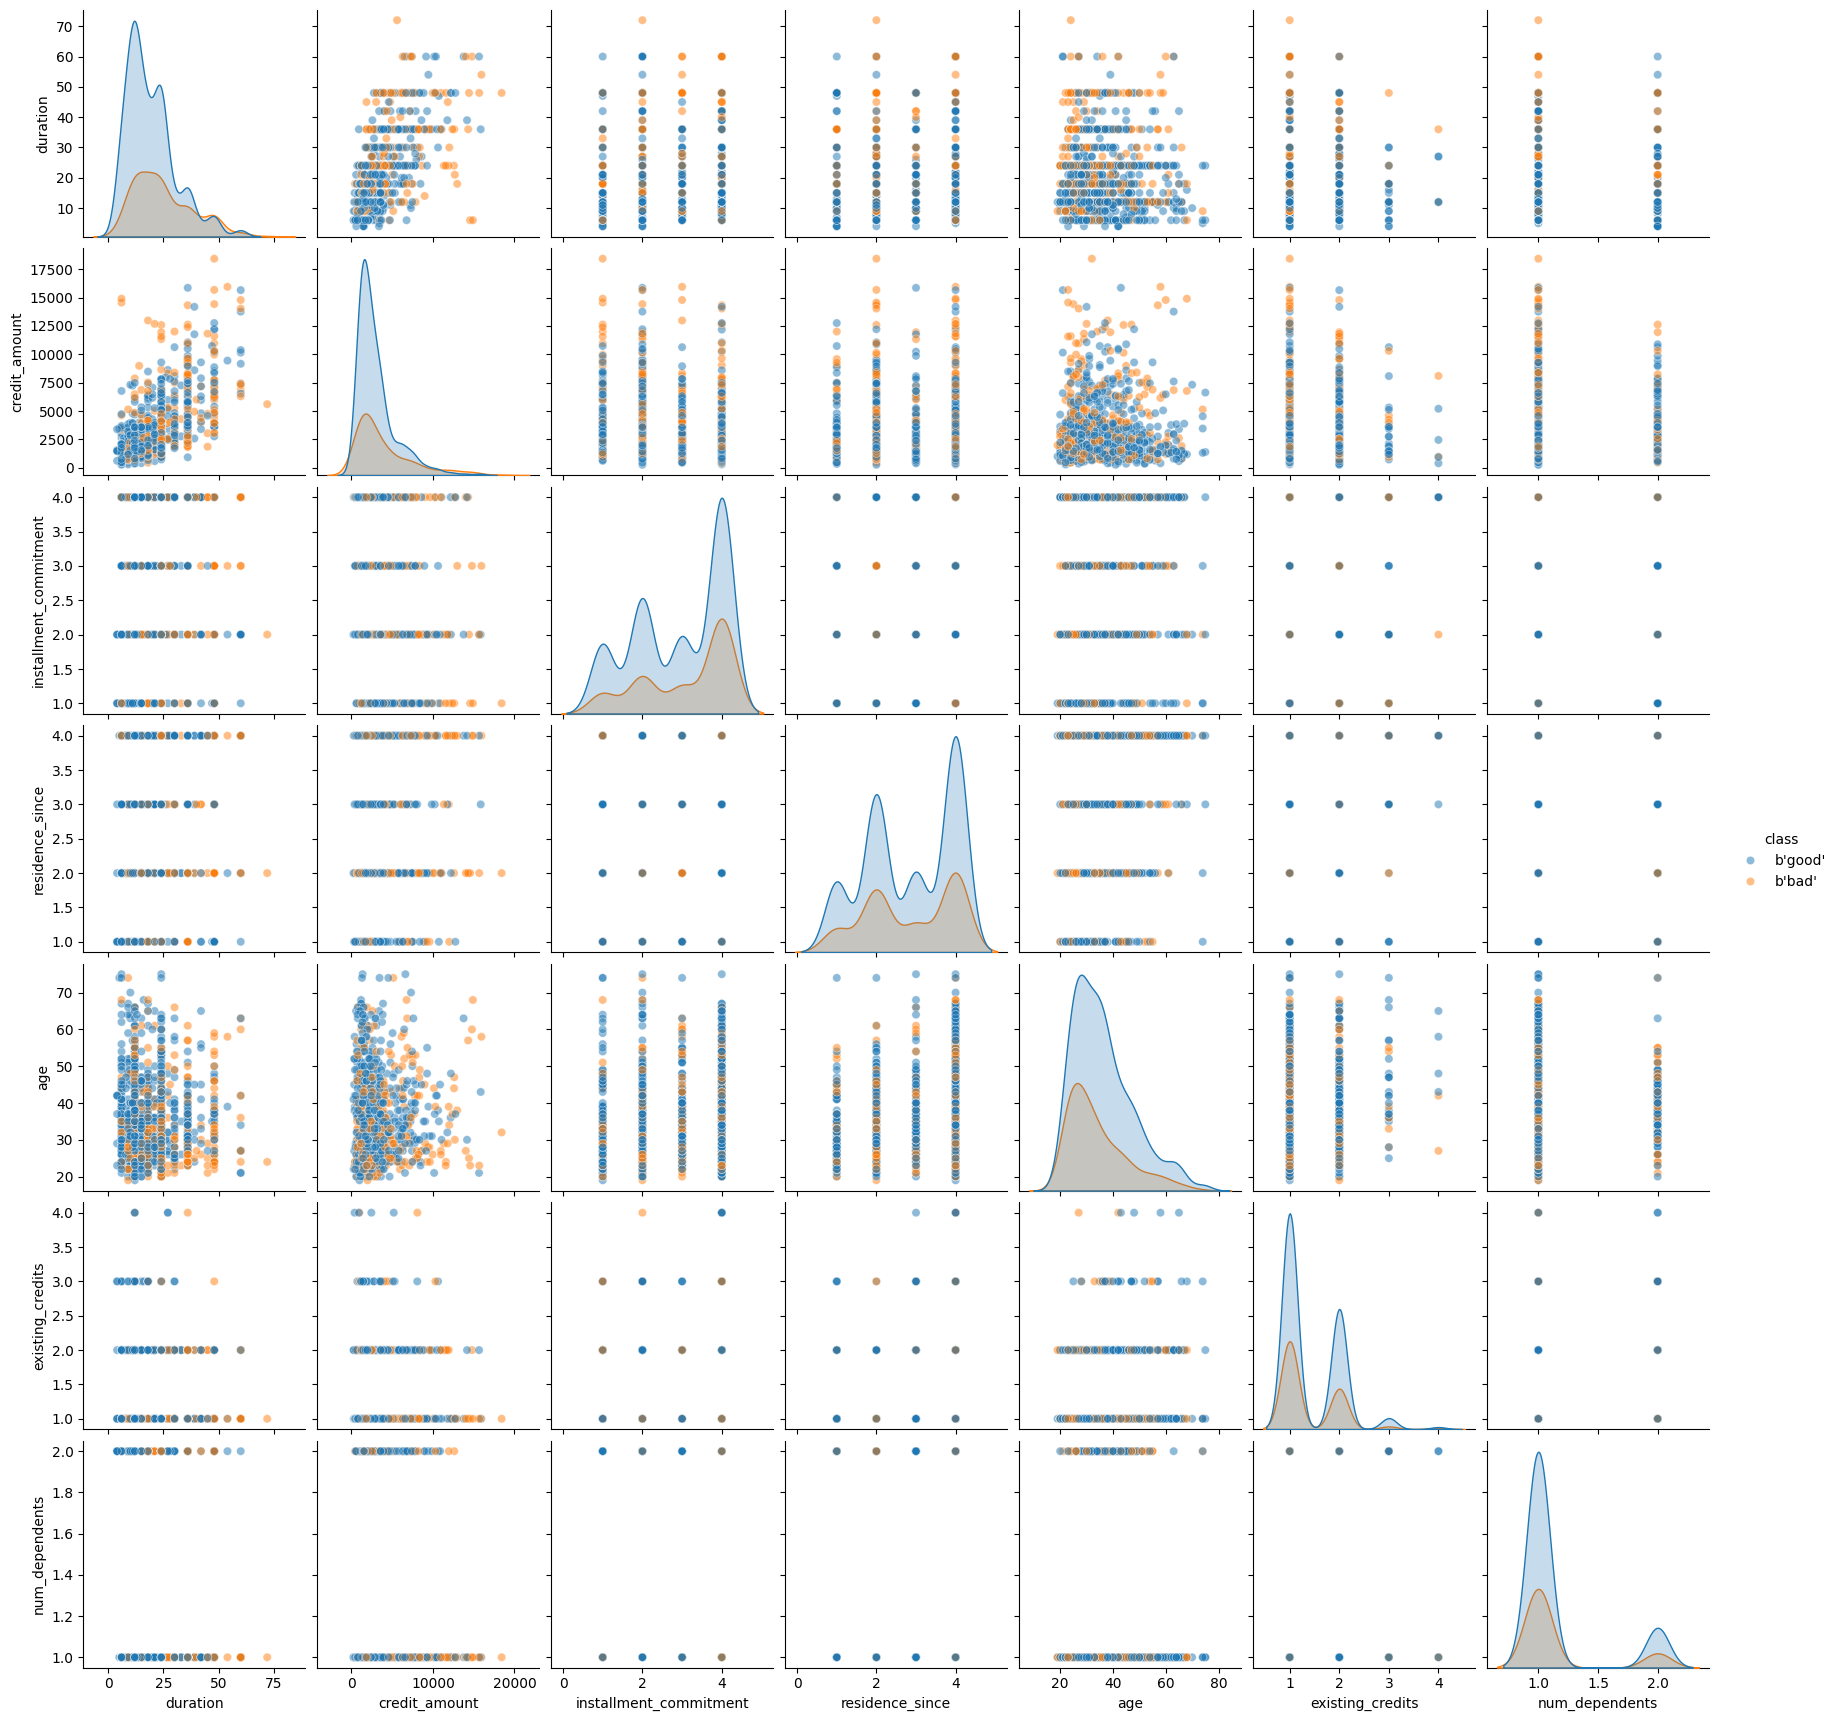

In [16]:
sns.pairplot(df, vars=num_features, hue='class', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

In [17]:
from scipy import stats

for cat in cat_features:
    # Create a contingency table
    contingency = pd.crosstab(df[cat], df['class'])

    # Run chi-square test
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency)

    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Degrees of freedom: {dof}")

    # Interpretation
    if p_val < 0.05:
        print(f"Significant association exists between {cat} and class \n")
    else:
        print(f"No significant association between {cat} and class \n")
    

Chi-square statistic: 123.7209
p-value: 0.0000
Degrees of freedom: 3
Significant association exists between checking_status and class 

Chi-square statistic: 61.6914
p-value: 0.0000
Degrees of freedom: 4
Significant association exists between credit_history and class 

Chi-square statistic: 33.3564
p-value: 0.0001
Degrees of freedom: 9
Significant association exists between purpose and class 

Chi-square statistic: 36.0989
p-value: 0.0000
Degrees of freedom: 4
Significant association exists between savings_status and class 

Chi-square statistic: 18.3683
p-value: 0.0010
Degrees of freedom: 4
Significant association exists between employment and class 

Chi-square statistic: 9.6052
p-value: 0.0222
Degrees of freedom: 3
Significant association exists between personal_status and class 

Chi-square statistic: 6.6454
p-value: 0.0361
Degrees of freedom: 2
Significant association exists between other_parties and class 

Chi-square statistic: 23.7196
p-value: 0.0000
Degrees of freedom: 3
Signi

Pearson's r: -0.2149
p-value: 0.0000
Significant negative correlation (r = -0.21) between duration and Class



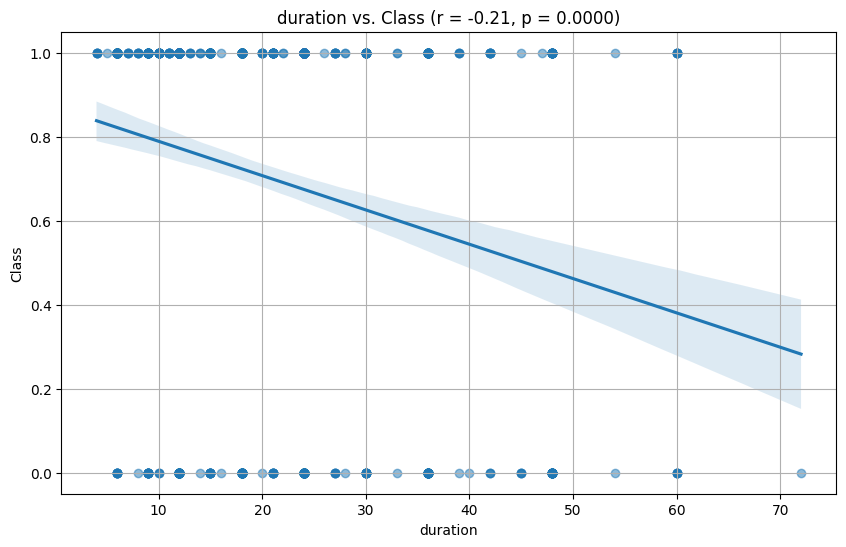

Pearson's r: -0.1547
p-value: 0.0000
Significant negative correlation (r = -0.15) between credit_amount and Class



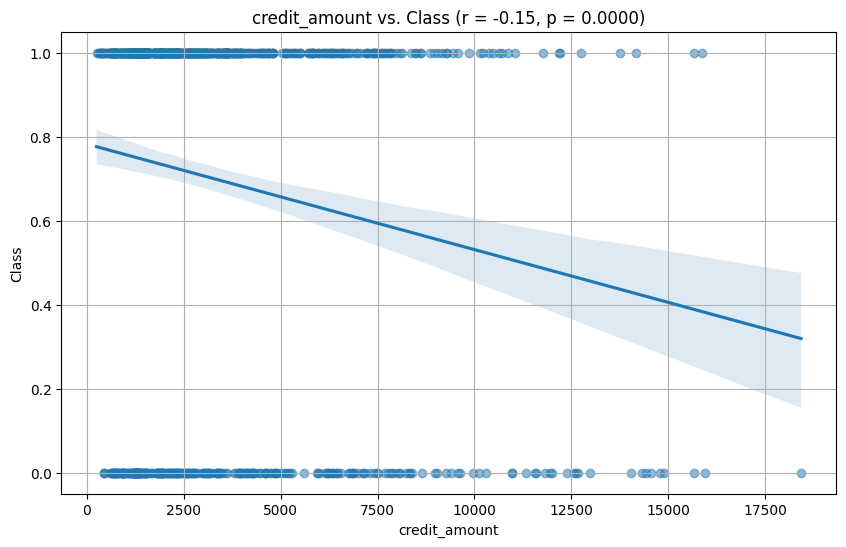

Pearson's r: -0.0724
p-value: 0.0220
Significant negative correlation (r = -0.07) between installment_commitment and Class



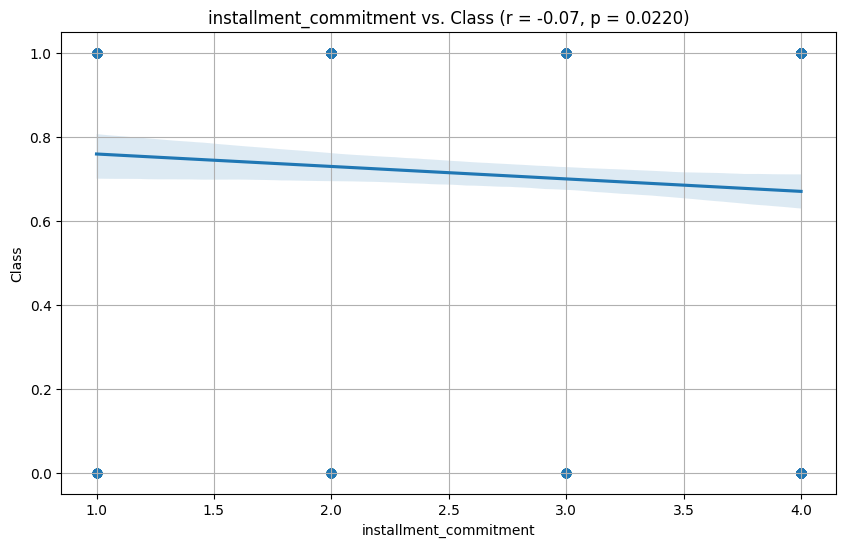

Pearson's r: -0.0030
p-value: 0.9253
No significant correlation between residence_since and Class



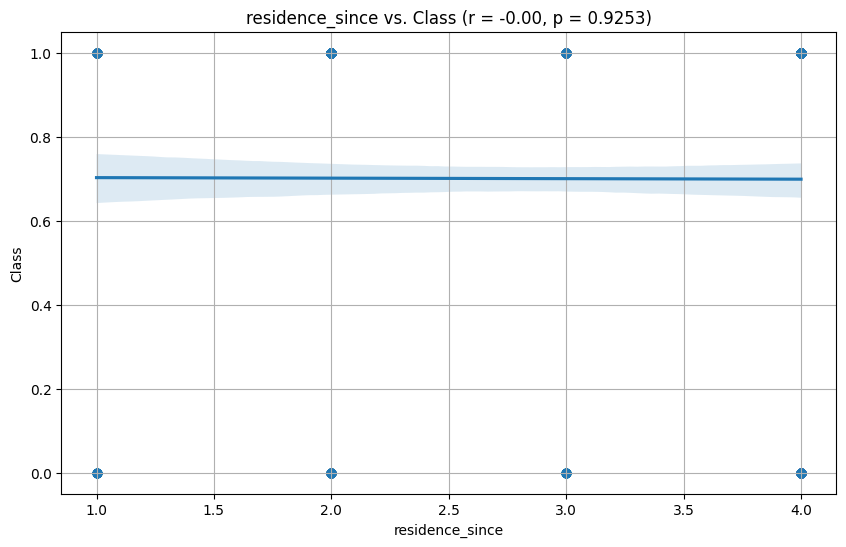

Pearson's r: 0.0911
p-value: 0.0039
Significant positive correlation (r = 0.09) between age and Class



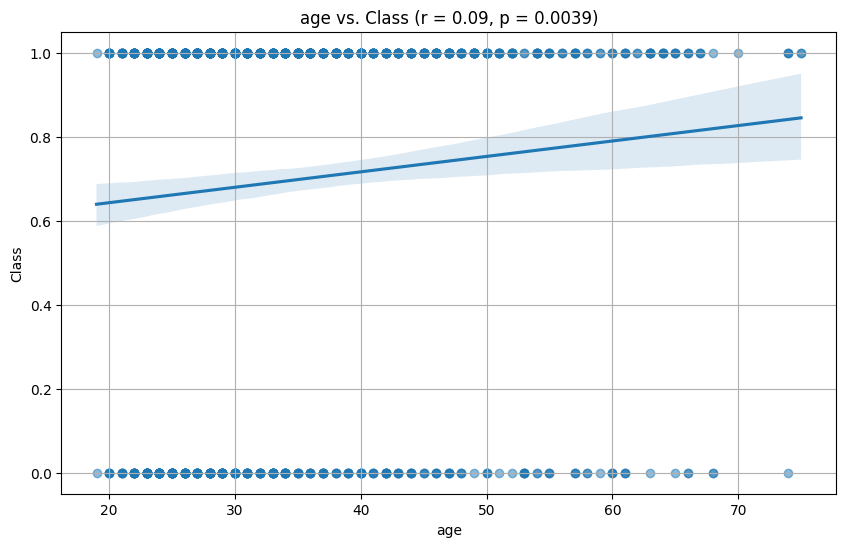

Pearson's r: 0.0457
p-value: 0.1484
No significant correlation between existing_credits and Class



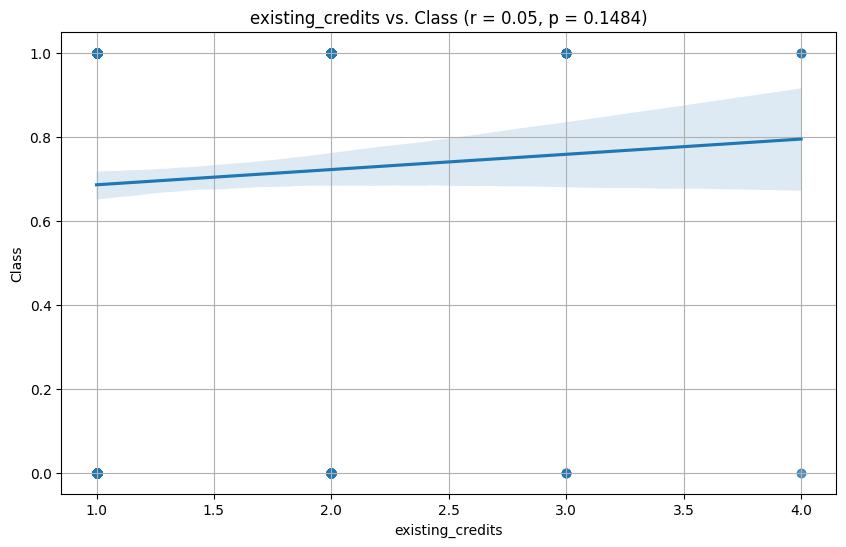

Pearson's r: 0.0030
p-value: 0.9241
No significant correlation between num_dependents and Class



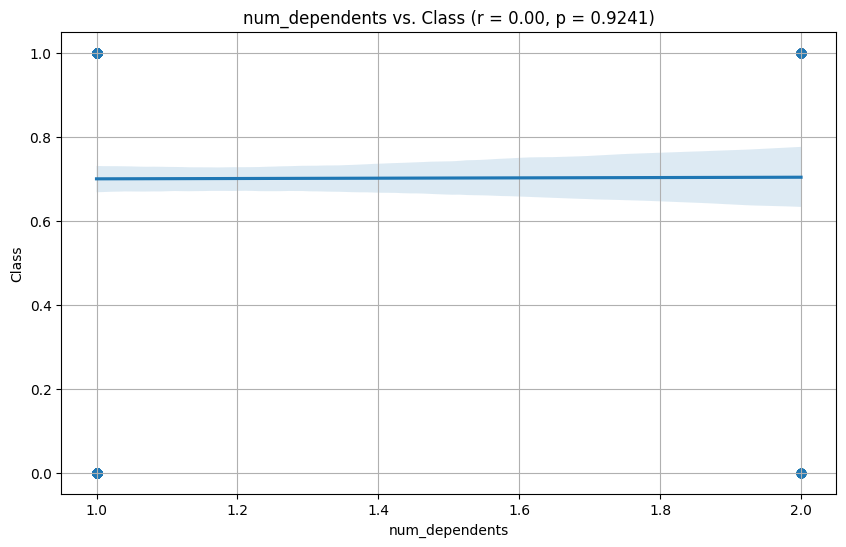

In [18]:
df['class'] = np.where(df['class'] == b'bad', 0, 1)
for cat in num_features:
    # Calculate Pearson correlation
    r, p_val = stats.pearsonr(df[cat], df['class'])
    
    print(f"Pearson's r: {r:.4f}")
    print(f"p-value: {p_val:.4f}")
    
    if p_val < 0.05:
        if r > 0:
            print(f"Significant positive correlation (r = {r:.2f}) between {cat} and Class")
        else:
            print(f"Significant negative correlation (r = {r:.2f}) between {cat} and Class")
    else:
        print(f"No significant correlation between {cat} and Class")
    print('')

    # Visualize with scatter plot and regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=cat, y='class', data=df, scatter_kws={'alpha':0.5})
    plt.title(f'{cat} vs. Class (r = {r:.2f}, p = {p_val:.4f})')
    plt.xlabel(cat)
    plt.ylabel('Class')
    plt.grid(True)
    plt.show()

# Prepare data and predict

In [19]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [20]:
for cat in cat_features:
    print(cat, df[cat].unique(), '\n')

checking_status [b'<0' b'0<=X<200' b'no checking' b'>=200'] 

credit_history [b'critical/other existing credit' b'existing paid' b'delayed previously'
 b'no credits/all paid' b'all paid'] 

purpose [b'radio/tv' b'education' b'furniture/equipment' b'new car' b'used car'
 b'business' b'domestic appliance' b'repairs' b'other' b'retraining'] 

savings_status [b'no known savings' b'<100' b'500<=X<1000' b'>=1000' b'100<=X<500'] 

employment [b'>=7' b'1<=X<4' b'4<=X<7' b'unemployed' b'<1'] 

personal_status [b'male single' b'female div/dep/mar' b'male div/sep' b'male mar/wid'] 

other_parties [b'none' b'guarantor' b'co applicant'] 

property_magnitude [b'real estate' b'life insurance' b'no known property' b'car'] 

other_payment_plans [b'none' b'bank' b'stores'] 

housing [b'own' b'for free' b'rent'] 

job [b'skilled' b'unskilled resident' b'high qualif/self emp/mgmt'
 b'unemp/unskilled non res'] 

own_telephone [b'yes' b'none'] 

foreign_worker [b'yes' b'no'] 

class [1 0] 



In [21]:
# Status of existing checking account
order = ['<0', 'no checking', '0<=X<200', '>=200']
oe = OrdinalEncoder(categories=[order])
df['checking_status'] = df['checking_status'].str.decode('utf-8')
df['checking_status'] = oe.fit_transform(df[['checking_status']])

# Credit history
order = ['critical/other existing credit',
         'delayed previously',
         'existing paid',
         'no credits/all paid',
         'all paid'] 
oe = OrdinalEncoder(categories=[order])
df['credit_history'] = df['credit_history'].str.decode('utf-8')
df['credit_history'] = oe.fit_transform(df[['credit_history']])

# Purpose
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])

# Savings account/bonds
order = ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000']
oe = OrdinalEncoder(categories=[order])
df['savings_status'] = df['savings_status'].str.decode('utf-8')
df['savings_status'] = oe.fit_transform(df[['savings_status']])

# Present employment since
order = ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7']
oe = OrdinalEncoder(categories=[order])
df['employment'] = df['employment'].str.decode('utf-8')
df['employment'] = oe.fit_transform(df[['employment']])

# Personal status and sex
le = LabelEncoder()
df['personal_status'] = df['personal_status'].str.decode('utf-8')
df['personal_status'] = le.fit_transform(df['personal_status'])

# Other debtors / guarantors
order = ['none', 'co applicant', 'guarantor']
oe = OrdinalEncoder(categories=[order])
df['other_parties'] = df['other_parties'].str.decode('utf-8')
df['other_parties'] = oe.fit_transform(df[['other_parties']])

# Property
order = ['no known property', 'car', 'life insurance', 'real estate']
oe = OrdinalEncoder(categories=[order])
df['property_magnitude'] = df['property_magnitude'].str.decode('utf-8')
df['property_magnitude'] = oe.fit_transform(df[['property_magnitude']])

# Other installment plans
order = ['stores', 'bank', 'none']
oe = OrdinalEncoder(categories=[order])
df['other_payment_plans'] = df['other_payment_plans'].str.decode('utf-8')
df['other_payment_plans'] = oe.fit_transform(df[['other_payment_plans']])

# Housing
order = ['for free', 'rent', 'own']
oe = OrdinalEncoder(categories=[order])
df['housing'] = df['housing'].str.decode('utf-8')
df['housing'] = oe.fit_transform(df[['housing']])

# Job
order = ['unemp/unskilled non res',
         'unskilled resident',
         'skilled',
         'high qualif/self emp/mgmt']
oe = OrdinalEncoder(categories=[order])
df['job'] = df['job'].str.decode('utf-8')
df['job'] = oe.fit_transform(df[['job']])

# Telephone
order = ['none', 'yes'] 
oe = OrdinalEncoder(categories=[order])
df['own_telephone'] = df['own_telephone'].str.decode('utf-8')
df['own_telephone'] = oe.fit_transform(df[['own_telephone']])

# Foreign worker
order = ['yes', 'no']
oe = OrdinalEncoder(categories=[order])
df['foreign_worker'] = df['foreign_worker'].str.decode('utf-8')
df['foreign_worker'] = oe.fit_transform(df[['foreign_worker']])

In [22]:
num_features

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

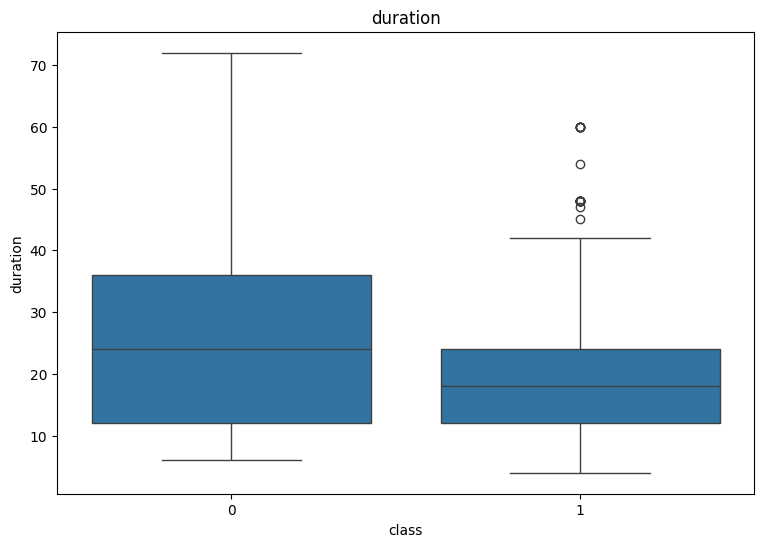

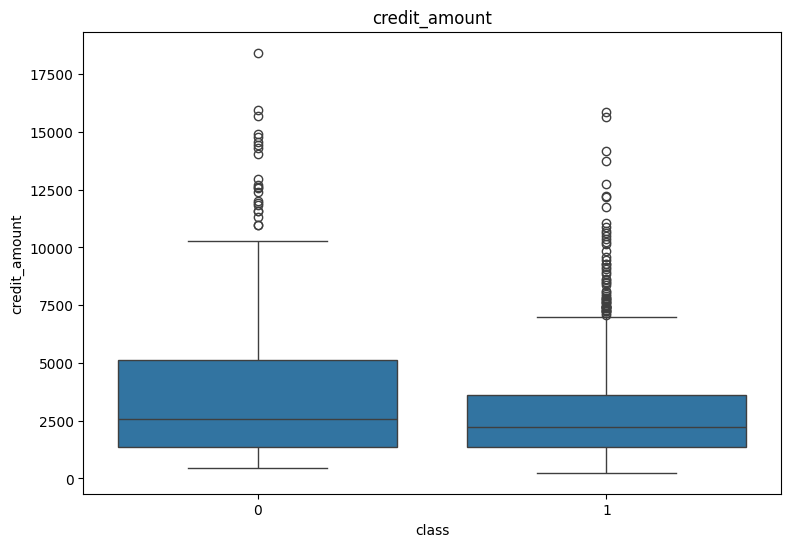

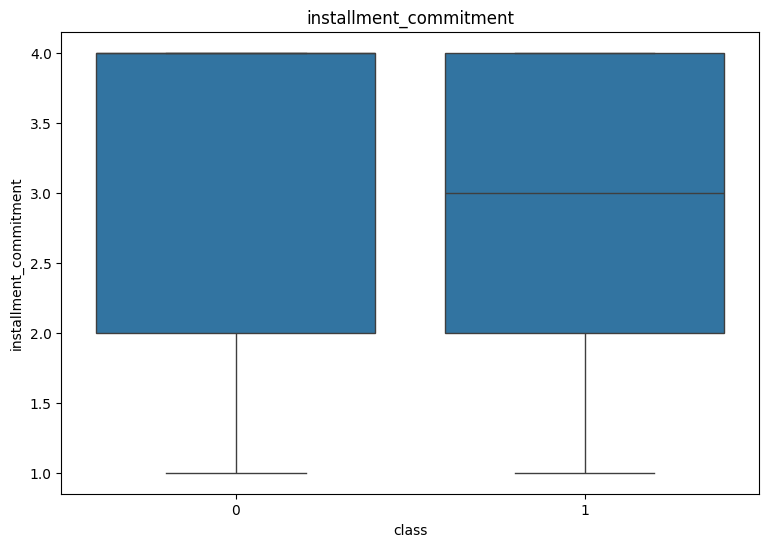

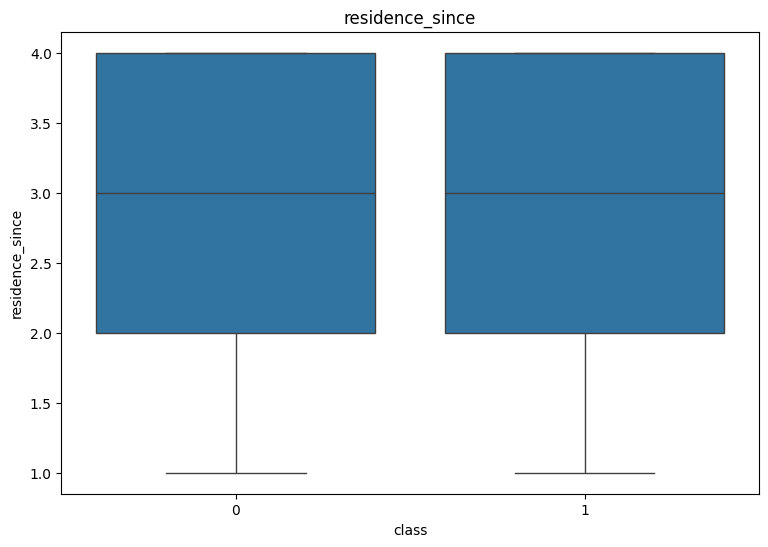

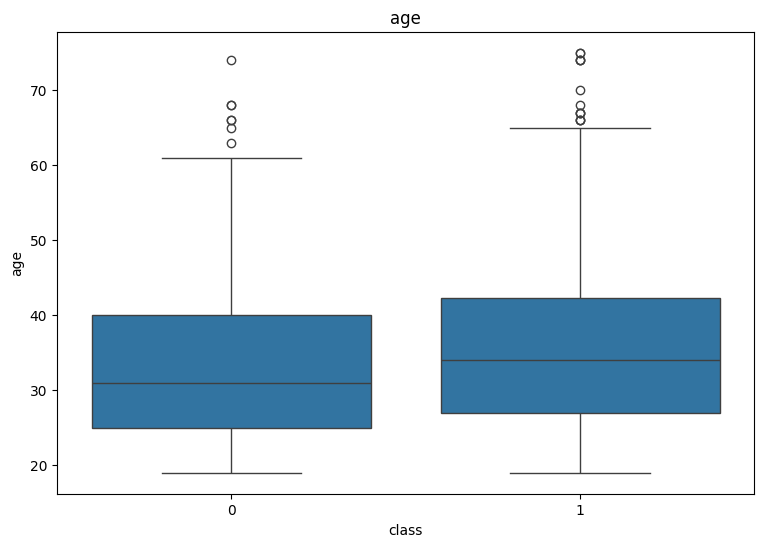

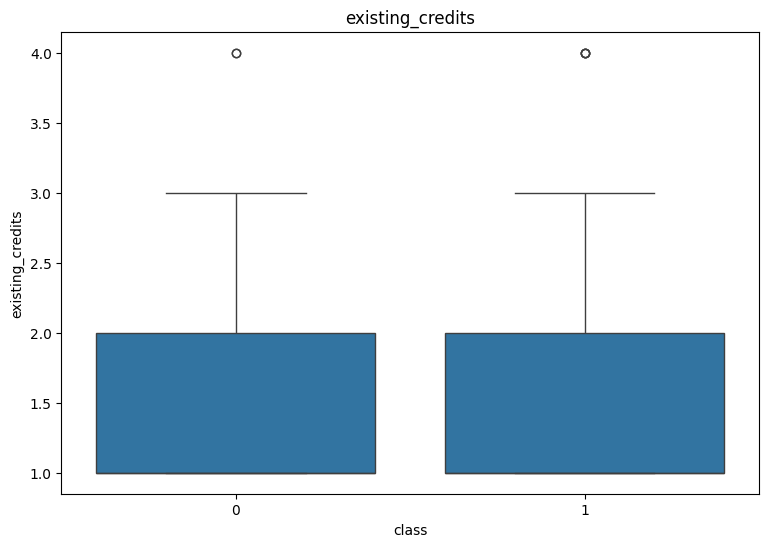

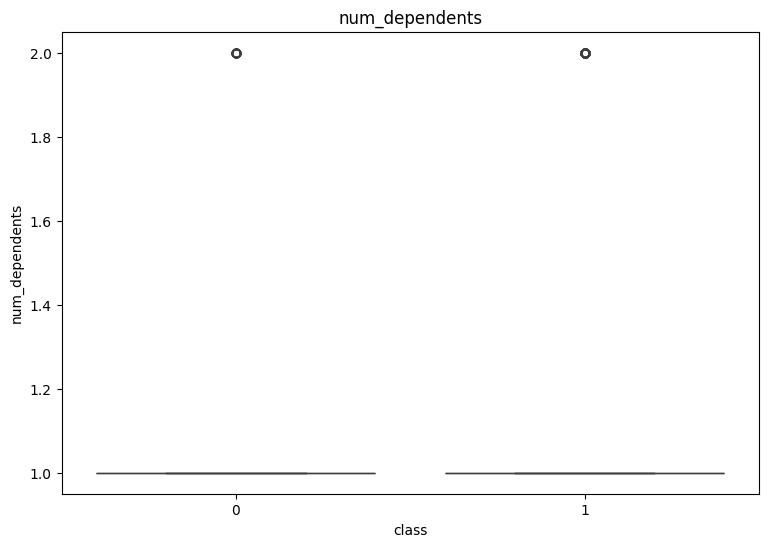

In [23]:
for feature in num_features:
    plt.figure(figsize=(9, 6))
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(feature)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay

# Define features and target
X = df.drop(['class'], axis=1)
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBoost Accuracy: 0.7800
XGBoost ROC AUC: 0.8203


<Figure size 1000x600 with 0 Axes>

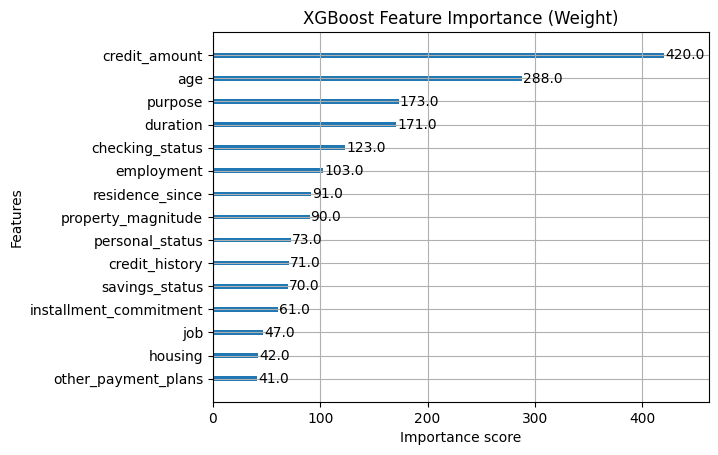

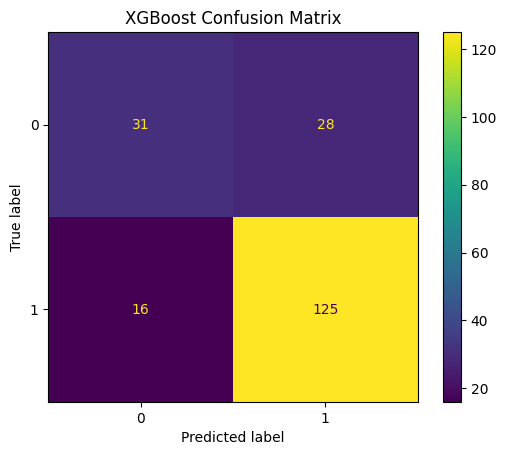

In [25]:
import xgboost as xgb
from xgboost import plot_importance

# Train XGBoost model
model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"XGBoost ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.4f}")

# Feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=15, importance_type='weight')
plt.title('XGBoost Feature Importance (Weight)')
plt.show()

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('XGBoost Confusion Matrix')
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\tabpfn\classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(



TabPFN Accuracy: 0.8000
TabPFN ROC AUC: 0.8322


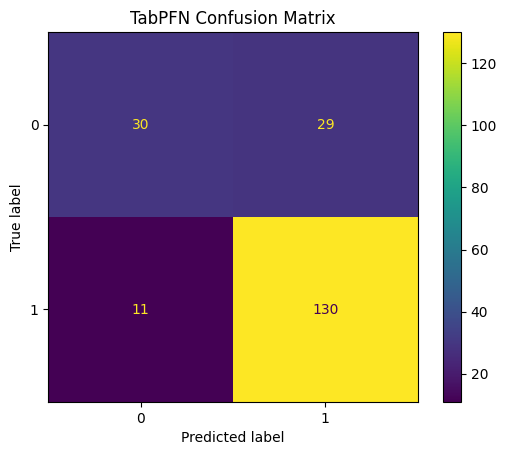

In [26]:
from tabpfn import TabPFNClassifier

# Initialize TabPFN (works best with <1000 samples)
n_samples = min(1000, len(X_train))  # TabPFN limitation
X_train_tabpfn = X_train[:n_samples].values
y_train_tabpfn = y_train[:n_samples].values

# Train TabPFN
tabpfn = TabPFNClassifier(device='cpu')
tabpfn.fit(X_train_tabpfn, y_train_tabpfn)

# Evaluate
tabpfn_probs = tabpfn.predict_proba(X_test.values)[:, 1]
tabpfn_preds = (tabpfn_probs > 0.5).astype(int)
print(f"\nTabPFN Accuracy: {accuracy_score(y_test, tabpfn_preds):.4f}")
print(f"TabPFN ROC AUC: {roc_auc_score(y_test, tabpfn_probs):.4f}")

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, tabpfn_preds)
plt.title('TabPFN Confusion Matrix')
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


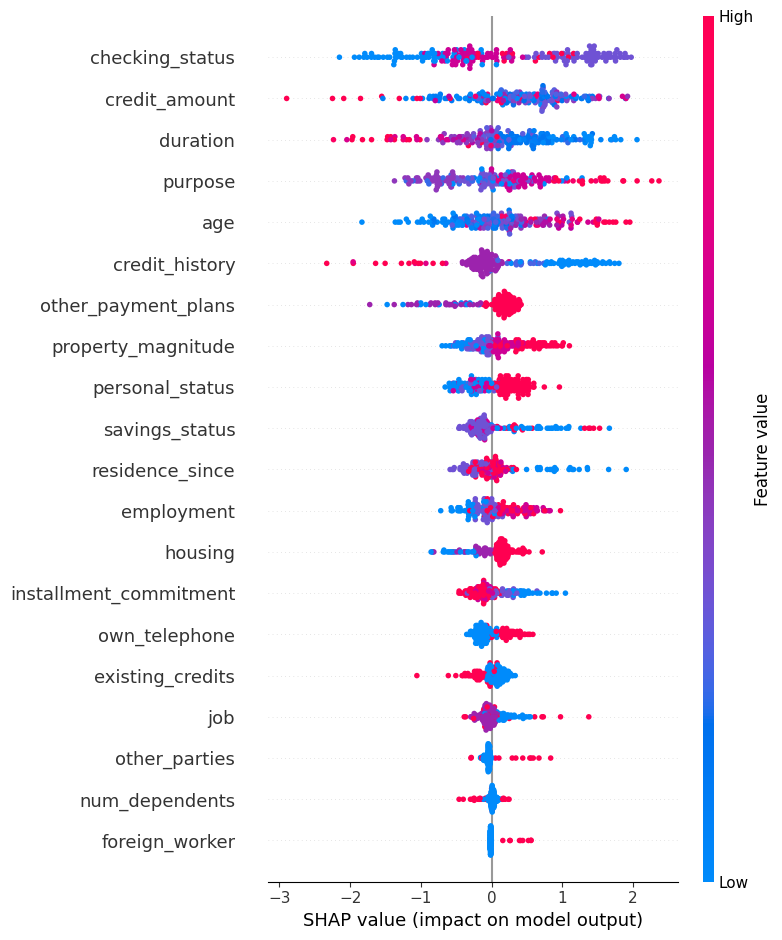

In [27]:
# SHAP values for detailed feature effects
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## Classifying with neural networks

### Defining the NN

In [28]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import optuna
from typing import Dict, List

# Configurar a semente aleatória para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

In [29]:
class ClassificationNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, act_fun=nn.ReLU(), dropout_rate=0.0):
        """
        Inicializa a arquitetura da rede neural para classificação.
        
        Parâmetros:
        input_size (int): Número de features de entrada
        hidden_size (list): Lista de número de neurônios em cada camada oculta
        output_size (int): Número de classes (2 para classificação binária)
        act_fun (nn.Module ou list): Função(ões) de ativação para usar. Pode ser:
            - Uma única ativação aplicada à todas as camadas
            - Uma lista de ativações para cada camada escondida
        """
        super(ClassificationNet, self).__init__()
        
        # Validate and process activation functions
        if isinstance(act_fun, list):
            if len(act_fun) != len(hidden_sizes):
                raise ValueError("act_fun list must match hidden_sizes length")
        else:
            act_fun = [act_fun for _ in hidden_sizes]
            
        # Validate and process dropout rates
        if isinstance(dropout_rate, list):
            if len(dropout_rate) != len(hidden_sizes):
                raise ValueError("dropout_rate list must match hidden_sizes length")
        else:
            dropout_rate = [dropout_rate for _ in hidden_sizes]
        
        layers = []
        in_features = input_size
        
        # Build hidden layers
        for i, (h_size, activation, drop_rate) in enumerate(zip(
            hidden_sizes, act_fun, dropout_rate)):
            
            # Linear layer
            linear_layer = nn.Linear(in_features, h_size)
            
            # Initialize weights based on activation
            self._init_weights(linear_layer, activation)
            
            layers.append(linear_layer)
            
            # Batch normalization
            layers.append(nn.BatchNorm1d(h_size))
            
            # Activation
            layers.append(activation)
            
            # Dropout (except after last hidden layer)
            if i < len(hidden_sizes) - 1 and drop_rate > 0:
                layers.append(nn.Dropout(drop_rate))
            
            in_features = h_size
        
        # Output layer (no activation or dropout)
        output_layer = nn.Linear(in_features, output_size)
        nn.init.xavier_normal_(output_layer.weight)
        nn.init.zeros_(output_layer.bias)
        layers.append(output_layer)
        
        # Combine all layers into a sequential model
        self.net = nn.Sequential(*layers)

    def _init_weights(self, layer, activation):
        """Initialize weights based on activation function"""
        if isinstance(activation, nn.ReLU) or isinstance(activation, nn.LeakyReLU):
            nn.init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
        elif isinstance(activation, nn.Tanh):
            nn.init.xavier_normal_(layer.weight, gain=5.0/3)  # Recommended for tanh
        elif isinstance(activation, nn.Sigmoid):
            nn.init.xavier_uniform_(layer.weight, gain=nn.init.calculate_gain('sigmoid'))
        else:  # Default initialization for unknown activations
            nn.init.xavier_normal_(layer.weight)
        
        # Initialize bias to zeros
        if layer.bias is not None:
            nn.init.zeros_(layer.bias)

    def forward(self, x):
        """
        Define the forward pass through the network.
        
        Parameters:
        x (Tensor): Input tensor
        
        Returns:
        Tensor: Output of the neural network
        """
        return self.net(x)

In [30]:
def load_model(path):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    checkpoint = torch.load(path, map_location=device)
    config = checkpoint['config']
    
    act_fun = getattr(torch.nn, config['act_fun'])()  # Convert string to class
    
    model = ClassificationNet(
        input_size=config['input_size'],
        hidden_sizes=config['hidden_sizes'],
        output_size=config['output_size'],
        act_fun=act_fun,
        dropout_rate=config['dropout_rate'],
    )
    model.load_state_dict(checkpoint['model_state_dict'])
    return model

In [31]:
def train_model(
    x_train, y_train,
    x_val=None, y_val=None,
    input_size=None,
    hidden_sizes=[50, 30],
    output_size=2,
    optimizer_class=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=None,  # If None: full-batch training (legacy mode)
    num_epochs=100,
    act_fun=torch.nn.ReLU(),
    dropout_rate=0.0,
    patience=5,
    min_delta=0.001,
    verbose=False,
    **dataloader_kwargs
):

    # --- Convert data to DataLoaders ONLY if batch_size is provided ---
    def _to_dataloader(features, labels, shuffle):
        if batch_size is None:  # Legacy mode (return raw tensors)
            features = torch.FloatTensor(features) if not isinstance(features, torch.Tensor) else features.float()
            labels = torch.LongTensor(labels) if not isinstance(labels, torch.Tensor) else labels.long()
            return features, labels
        else:  # Mini-batch mode
            dataset = DatasetWrapper(features, labels)
            return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, **dataloader_kwargs)

    class DatasetWrapper(Dataset):
        """Minimal wrapper to convert raw data to a PyTorch Dataset."""
        def __init__(self, features, labels):
            self.features = torch.FloatTensor(features) if not isinstance(features, torch.Tensor) else features.float()
            self.labels = torch.LongTensor(labels) if not isinstance(labels, torch.Tensor) else labels.long()
        def __len__(self):
            return len(self.features)
        def __getitem__(self, idx):
            return self.features[idx], self.labels[idx]
    
    x_train, x_val = torch.Tensor(x_train), torch.Tensor(x_val)
    y_train, y_val = torch.Tensor(y_train), torch.Tensor(y_val)
    
    output_size = len(torch.unique(y_train))  # Automatically detect

    # Prepare data loaders or raw tensors
    train_data = _to_dataloader(x_train, y_train, shuffle=True)
    val_data = _to_dataloader(x_val, y_val, shuffle=False) if x_val is not None else None

    # --- Model setup ---
    input_dim = input_size if input_size else (
        train_data.dataset.features.shape[1] if batch_size else train_data.shape[1]
    )
    model = ClassificationNet(
        input_size=input_dim,
        hidden_sizes=hidden_sizes,
        output_size=output_size,
        act_fun=act_fun,
        dropout_rate=dropout_rate
    )
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optimizer_class(model.parameters(), lr=learning_rate)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=min(int(patience/10 + 2), patience))

    # --- Training loop ---
    train_losses, val_losses, val_accs = [], [], []
    best_val_loss = float('inf')
    best_val_acc = float('-inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        # --- Training phase ---
        model.train()
        total_correct = 0
        
        if batch_size:  # Mini-batch mode
            epoch_train_loss = 0.0
            for batch_x, batch_y in train_data:
                optimizer.zero_grad()
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                epoch_train_loss += loss.item() * batch_x.size(0)
                _, preds = torch.max(outputs, 1)
                total_correct += (preds == batch_y).sum().item()
            train_loss = epoch_train_loss / len(train_data.dataset)
            # train_acc = total_correct / len(train_data.dataset)
        else:  # Full-batch mode
            optimizer.zero_grad()
            outputs = model(train_data[0])  # train_data is (features, labels)
            loss = criterion(outputs, train_data[1])
            loss.backward()
            optimizer.step()
            train_loss = loss.item()
            _, preds = torch.max(outputs, 1)
            # train_acc = (preds == train_data[1]).sum().item() / len(train_data.dataset)
        train_losses.append(train_loss)

        # --- Validation phase ---
        if val_data is not None:
            model.eval()
            with torch.no_grad():
                if batch_size:  # Mini-batch validation
                    epoch_val_loss = 0.0
                    val_acc = 0
                    for batch_x, batch_y in val_data:
                        outputs = model(batch_x)
                        epoch_val_loss += criterion(outputs, batch_y).item() * batch_x.size(0)
                        _, preds = torch.max(outputs, 1)
                        val_acc += (preds == batch_y).float().mean()
                    val_loss = epoch_val_loss / len(val_data.dataset)
                    val_acc = val_acc / len(val_data.dataset)
                else:  # Full-batch validation
                    outputs = model(val_data[0])
                    val_loss = criterion(outputs, val_data[1]).item()
                    _, preds = torch.max(outputs, 1)
                    val_acc = (preds == val_data[1]).float().mean()
            scheduler.step(val_loss)
            val_accs.append(val_acc)
            val_losses.append(val_loss)
            
            if verbose:
                current_lr = optimizer.param_groups[0]['lr']
                print(f"Learning Rate after epoch {epoch+1}: {current_lr:.6f}")

            # Early stopping
            if val_loss < best_val_loss - min_delta or val_acc > best_val_acc:
                epochs_no_improve = 0
                best_val_acc = val_acc
                best_val_loss = val_loss
                best_model_weights = model.state_dict().copy()
                
                # Save (always move to CPU first)
                torch.save({
                    'model_state_dict': model.state_dict(),
                    'config': {
                        'input_size': input_size,
                        'hidden_sizes': hidden_sizes,
                        'output_size': output_size,
                        'act_fun': type(act_fun).__name__,
                        'dropout_rate': dropout_rate,
                    }
                }, 'model.pth')
            elif val_loss >= best_val_loss:
                epochs_no_improve += 1
                if epochs_no_improve >= patience:
                    break

        # Logging
        if verbose and (epoch % 10 == 0 or epoch == num_epochs - 1):
            log_msg = f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}"
            if val_data is not None:
                log_msg += f" | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}"
            print(log_msg)

    # Load best model if early stopping was triggered
    if val_data is not None and 'best_model_weights' in locals():
        # model.load_state_dict(best_model_weights)
        model = load_model('model.pth')

    return model, train_losses, val_losses if val_data is not None else None

In [40]:
def evaluate_model(model, x, y):
    # Definir o modelo para modo de avaliação
    model.eval()
    
    x = torch.FloatTensor(x) if not isinstance(x, torch.Tensor) else x.float()
    y = torch.LongTensor(y) if not isinstance(y, torch.Tensor) else y.float()

    # Desabilitar o cálculo de gradientes para avaliação
    with torch.no_grad():
        # Fazer previsões no conjunto de teste
        outputs = model(x)
        _, predicted = torch.max(outputs.data, 1)
        
        # Calcular a acurácia
        accuracy = (predicted == y).sum().item() / y.size(0)
        # print(f'Acurácia no conjunto de teste: {accuracy:.4f}')
    
    return predicted, accuracy

In [33]:
def cross_validate(
    X, y, 
    input_size, 
    hidden_sizes, 
    output_size,
    n_splits=5,
    learning_rate=0.001,
    batch_size=32,
    num_epochs=100,
    act_fun=nn.ReLU(),
    dropout_rate=0,
    patience=5,
    random_state=42
):
    """
    Perform k-fold cross-validation.
    
    Returns:
    - Tuple of (mean_accuracy, std_accuracy, all_accuracies)
    """
    inner_cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    accuracies = []
    
    for inner_fold, (train_idx, val_idx) in enumerate(inner_cv.split(X)):
        
        # Split data
        X_train, X_val = X[train_idx, :], X[val_idx, :]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # # Convert to tensors
        # X_train_tensor = torch.FloatTensor(X_train)
        # y_train_tensor = torch.LongTensor(y_train)
        # X_val_tensor = torch.FloatTensor(X_val)
        # y_val_tensor = torch.LongTensor(y_val)
        
        # Train model
        model, _, _ = train_model(
            x_train=X_train,
            y_train=y_train,
            x_val=X_val,
            y_val=y_val,
            input_size=input_size,
            hidden_sizes=hidden_sizes,
            output_size=output_size,
            learning_rate=learning_rate,
            batch_size=batch_size,
            num_epochs=num_epochs,
            act_fun=act_fun,
            dropout_rate=dropout_rate,
            patience=patience,
            verbose=False
        )
    
        # Evaluate accuracy
        _, acc = evaluate_model(model, X_val, y_val)
        accuracies.append(acc)
    
    print(f"Accuracy: {np.mean(accuracies):.3f} ± {np.std(accuracies):.3f}")

    return np.mean(accuracies), np.std(accuracies), accuracies

# Usage Example
# mean_acc, std_acc, fold_accs = cross_validate(
#     X=X,
#     y=y,
#     input_size=input_size,
#     hidden_sizes=hidden_sizes,
#     output_size=output_size,
#     n_splits=5,
#     learning_rate=0.001
# )
# 
# print(f"\nFinal CV Accuracy: {mean_acc:.3f} ± {std_acc:.3f}")
# print("Per-fold accuracies:", [f"{a:.3f}" for a in fold_accs])

In [42]:
def objective(trial):
    # Number of layers and neurons in each layer
    hs = [0, 8, 16, 32, 64]
    hidden_sizes = []
    for i in range(4):
        hsi = trial.suggest_int(f'hs{i}', 0, 4)
        if hsi != 0:
            hidden_sizes.append(hs[hsi])

    # Dropout rate
    dropout_rate = trial.suggest_float('dropout', 0, 0.5)
    
    # Activation functions
    act_fun_list = [
        nn.ReLU(),
        nn.LeakyReLU(),
        nn.GELU(),
        nn.ELU(),
        nn.Sigmoid(),
        nn.Tanh(),
        ]
    act_fun = act_fun_list[trial.suggest_int('act_fun', 0, 5)]
    
    # Number of epochs
    num_epochs = trial.suggest_int('num_epochs', 50, 1000)
    
    # Batch size
    batch_size = trial.suggest_int('batch_size', 1, 8)*8
    
    # Learning rate
    learning_rate = trial.suggest_float('lr', 0.0005, 0.01)

    cv_mean, _, _, = cross_validate(
    X_train, y_train,
    input_size=X_train.shape[1],
    hidden_sizes=hidden_sizes,
    output_size=2,
    n_splits=5,
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_epochs=num_epochs,
    act_fun=act_fun,
    dropout_rate=dropout_rate,
    patience=5,
    random_state=42
    )

    return -cv_mean

## Classifying with other machine learning models

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabpfn import TabPFNClassifier  # must be installed and imported properly
import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

from sklearn.datasets import make_classification

In [36]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM (RBF kernel)': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'LightGBM': LGBMClassifier(verbose=0),
    'CatBoost': CatBoostClassifier(verbose=0),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
    'TabPFN': TabPFNClassifier(device='cuda' if torch.cuda.is_available() else 'cpu'),
    'Neural Network': ''
}

In [37]:
y = y.to_numpy()
X = X.to_numpy()

In [38]:
def min_max_normalization(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [ ]:
# Simulated classification data (replace with real dataset)
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [43]:
# Optimize neural network architecture
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=i
)

X_train, X_test = min_max_normalization(X_train, X_test)

study = optuna.create_study()
study.optimize(objective, n_trials=150)


[I 2025-06-10 16:45:34,106] A new study created in memory with name: no-name-4fc89cb1-40aa-4eee-b99b-fd8ff4f49bf3
[I 2025-06-10 16:45:51,935] Trial 0 finished with value: -0.73875 and parameters: {'hs0': 4, 'hs1': 2, 'hs2': 0, 'hs3': 1, 'dropout': 0.07844595775989216, 'act_fun': 1, 'num_epochs': 339, 'batch_size': 2, 'lr': 0.0005066964028889356}. Best is trial 0 with value: -0.73875.


Accuracy: 0.739 ± 0.023


[I 2025-06-10 16:46:03,546] Trial 1 finished with value: -0.7437500000000001 and parameters: {'hs0': 2, 'hs1': 4, 'hs2': 4, 'hs3': 3, 'dropout': 0.4081809399393465, 'act_fun': 1, 'num_epochs': 471, 'batch_size': 4, 'lr': 0.003103556782496824}. Best is trial 1 with value: -0.7437500000000001.


Accuracy: 0.744 ± 0.016


[I 2025-06-10 16:46:11,157] Trial 2 finished with value: -0.745 and parameters: {'hs0': 1, 'hs1': 2, 'hs2': 3, 'hs3': 3, 'dropout': 0.22088469623173929, 'act_fun': 4, 'num_epochs': 804, 'batch_size': 4, 'lr': 0.0032757254850989044}. Best is trial 2 with value: -0.745.


Accuracy: 0.745 ± 0.024


[I 2025-06-10 16:46:39,032] Trial 3 finished with value: -0.7375 and parameters: {'hs0': 2, 'hs1': 3, 'hs2': 0, 'hs3': 3, 'dropout': 0.44097615419562675, 'act_fun': 1, 'num_epochs': 174, 'batch_size': 2, 'lr': 0.009423873981491427}. Best is trial 2 with value: -0.745.


Accuracy: 0.738 ± 0.034


[I 2025-06-10 16:46:57,303] Trial 4 finished with value: -0.7525 and parameters: {'hs0': 0, 'hs1': 3, 'hs2': 4, 'hs3': 2, 'dropout': 0.032406601727985096, 'act_fun': 4, 'num_epochs': 287, 'batch_size': 1, 'lr': 0.007315793728737783}. Best is trial 4 with value: -0.7525.


Accuracy: 0.752 ± 0.026


[I 2025-06-10 16:47:03,025] Trial 5 finished with value: -0.7550000000000001 and parameters: {'hs0': 3, 'hs1': 2, 'hs2': 0, 'hs3': 1, 'dropout': 0.30761664219305557, 'act_fun': 3, 'num_epochs': 442, 'batch_size': 7, 'lr': 0.001914573961809055}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.755 ± 0.025


[I 2025-06-10 16:47:15,083] Trial 6 finished with value: -0.7449999999999999 and parameters: {'hs0': 3, 'hs1': 3, 'hs2': 4, 'hs3': 0, 'dropout': 0.07568546057807451, 'act_fun': 4, 'num_epochs': 321, 'batch_size': 2, 'lr': 0.002070292045094556}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.745 ± 0.026


[I 2025-06-10 16:47:29,725] Trial 7 finished with value: -0.74 and parameters: {'hs0': 1, 'hs1': 1, 'hs2': 0, 'hs3': 0, 'dropout': 0.149220195323661, 'act_fun': 0, 'num_epochs': 281, 'batch_size': 5, 'lr': 0.0006771394708724041}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.740 ± 0.019


[I 2025-06-10 16:47:36,172] Trial 8 finished with value: -0.735 and parameters: {'hs0': 4, 'hs1': 1, 'hs2': 3, 'hs3': 1, 'dropout': 0.2950216512857517, 'act_fun': 4, 'num_epochs': 522, 'batch_size': 5, 'lr': 0.008588384882808416}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.735 ± 0.031


[I 2025-06-10 16:47:41,346] Trial 9 finished with value: -0.74375 and parameters: {'hs0': 4, 'hs1': 1, 'hs2': 2, 'hs3': 0, 'dropout': 0.36047510035555913, 'act_fun': 3, 'num_epochs': 407, 'batch_size': 7, 'lr': 0.001528050730931065}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.744 ± 0.027


[I 2025-06-10 16:47:47,107] Trial 10 finished with value: -0.74875 and parameters: {'hs0': 3, 'hs1': 0, 'hs2': 1, 'hs3': 4, 'dropout': 0.49832340481485227, 'act_fun': 2, 'num_epochs': 800, 'batch_size': 8, 'lr': 0.005224055764933044}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.749 ± 0.029


[I 2025-06-10 16:47:50,024] Trial 11 finished with value: -0.7537499999999999 and parameters: {'hs0': 0, 'hs1': 3, 'hs2': 2, 'hs3': 2, 'dropout': 0.014799168677880448, 'act_fun': 5, 'num_epochs': 72, 'batch_size': 7, 'lr': 0.00696664709869259}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.754 ± 0.027


[I 2025-06-10 16:47:52,873] Trial 12 finished with value: -0.7525 and parameters: {'hs0': 0, 'hs1': 4, 'hs2': 1, 'hs3': 2, 'dropout': 0.2512180826546152, 'act_fun': 5, 'num_epochs': 54, 'batch_size': 7, 'lr': 0.006157152368965885}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.752 ± 0.018


[I 2025-06-10 16:47:57,205] Trial 13 finished with value: -0.7449999999999999 and parameters: {'hs0': 3, 'hs1': 2, 'hs2': 2, 'hs3': 1, 'dropout': 0.17946207212568022, 'act_fun': 5, 'num_epochs': 997, 'batch_size': 6, 'lr': 0.0047061371544466785}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.745 ± 0.026


[I 2025-06-10 16:48:00,988] Trial 14 finished with value: -0.7350000000000001 and parameters: {'hs0': 1, 'hs1': 3, 'hs2': 1, 'hs3': 2, 'dropout': 0.3147319676492036, 'act_fun': 3, 'num_epochs': 658, 'batch_size': 8, 'lr': 0.006943981744702974}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.735 ± 0.029


[I 2025-06-10 16:48:06,988] Trial 15 finished with value: -0.725 and parameters: {'hs0': 2, 'hs1': 4, 'hs2': 3, 'hs3': 1, 'dropout': 0.13447473840670227, 'act_fun': 2, 'num_epochs': 97, 'batch_size': 6, 'lr': 0.004010639844813755}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.725 ± 0.037


[I 2025-06-10 16:48:09,336] Trial 16 finished with value: -0.7550000000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 1, 'hs3': 2, 'dropout': 0.02243250243646922, 'act_fun': 5, 'num_epochs': 692, 'batch_size': 7, 'lr': 0.008111770795761803}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.755 ± 0.025


[I 2025-06-10 16:48:15,114] Trial 17 finished with value: -0.74875 and parameters: {'hs0': 3, 'hs1': 0, 'hs2': 1, 'hs3': 4, 'dropout': 0.2855102155055327, 'act_fun': 3, 'num_epochs': 650, 'batch_size': 6, 'lr': 0.008595330587943787}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.749 ± 0.039


[I 2025-06-10 16:48:17,561] Trial 18 finished with value: -0.74125 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 0, 'hs3': 1, 'dropout': 0.21986921197122294, 'act_fun': 2, 'num_epochs': 671, 'batch_size': 8, 'lr': 0.008169314143336577}. Best is trial 5 with value: -0.7550000000000001.


Accuracy: 0.741 ± 0.029


[I 2025-06-10 16:48:22,086] Trial 19 finished with value: -0.75875 and parameters: {'hs0': 3, 'hs1': 1, 'hs2': 1, 'hs3': 3, 'dropout': 0.34605904989559994, 'act_fun': 5, 'num_epochs': 762, 'batch_size': 7, 'lr': 0.006188362768537436}. Best is trial 19 with value: -0.75875.


Accuracy: 0.759 ± 0.038


[I 2025-06-10 16:48:29,922] Trial 20 finished with value: -0.7475 and parameters: {'hs0': 3, 'hs1': 1, 'hs2': 0, 'hs3': 3, 'dropout': 0.3580176778866536, 'act_fun': 0, 'num_epochs': 981, 'batch_size': 5, 'lr': 0.005919499050102859}. Best is trial 19 with value: -0.75875.


Accuracy: 0.748 ± 0.019


[I 2025-06-10 16:48:35,228] Trial 21 finished with value: -0.7425 and parameters: {'hs0': 2, 'hs1': 0, 'hs2': 1, 'hs3': 3, 'dropout': 0.3541658376602938, 'act_fun': 5, 'num_epochs': 786, 'batch_size': 7, 'lr': 0.009692688048778379}. Best is trial 19 with value: -0.75875.


Accuracy: 0.743 ± 0.021


[I 2025-06-10 16:48:42,247] Trial 22 finished with value: -0.74625 and parameters: {'hs0': 3, 'hs1': 1, 'hs2': 1, 'hs3': 2, 'dropout': 0.42109355944217725, 'act_fun': 4, 'num_epochs': 587, 'batch_size': 6, 'lr': 0.00599630587342484}. Best is trial 19 with value: -0.75875.


Accuracy: 0.746 ± 0.033


[I 2025-06-10 16:48:46,182] Trial 23 finished with value: -0.7462500000000001 and parameters: {'hs0': 4, 'hs1': 2, 'hs2': 1, 'hs3': 4, 'dropout': 0.25188722366683997, 'act_fun': 5, 'num_epochs': 732, 'batch_size': 8, 'lr': 0.007858970333909546}. Best is trial 19 with value: -0.75875.


Accuracy: 0.746 ± 0.025


[I 2025-06-10 16:48:51,794] Trial 24 finished with value: -0.7612500000000001 and parameters: {'hs0': 2, 'hs1': 0, 'hs2': 2, 'hs3': 3, 'dropout': 0.3211358405314342, 'act_fun': 3, 'num_epochs': 895, 'batch_size': 7, 'lr': 0.00481020879079175}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.761 ± 0.029


[I 2025-06-10 16:48:58,993] Trial 25 finished with value: -0.7387499999999999 and parameters: {'hs0': 2, 'hs1': 1, 'hs2': 2, 'hs3': 3, 'dropout': 0.33320990364976666, 'act_fun': 3, 'num_epochs': 828, 'batch_size': 6, 'lr': 0.004082172821091377}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.739 ± 0.024


[I 2025-06-10 16:49:04,677] Trial 26 finished with value: -0.7474999999999999 and parameters: {'hs0': 2, 'hs1': 2, 'hs2': 0, 'hs3': 4, 'dropout': 0.3905074606464309, 'act_fun': 3, 'num_epochs': 887, 'batch_size': 7, 'lr': 0.002425611063593359}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.747 ± 0.031


[I 2025-06-10 16:49:25,017] Trial 27 finished with value: -0.7425 and parameters: {'hs0': 3, 'hs1': 1, 'hs2': 2, 'hs3': 3, 'dropout': 0.4932005873419909, 'act_fun': 2, 'num_epochs': 892, 'batch_size': 4, 'lr': 0.004616105306905937}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.743 ± 0.027


[I 2025-06-10 16:49:28,701] Trial 28 finished with value: -0.7462500000000001 and parameters: {'hs0': 3, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.2863399480917743, 'act_fun': 4, 'num_epochs': 902, 'batch_size': 8, 'lr': 0.0031931810373309385}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.746 ± 0.028


[I 2025-06-10 16:49:37,027] Trial 29 finished with value: -0.70625 and parameters: {'hs0': 4, 'hs1': 2, 'hs2': 0, 'hs3': 2, 'dropout': 0.4491758049343922, 'act_fun': 1, 'num_epochs': 585, 'batch_size': 5, 'lr': 0.0005066581659733107}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.706 ± 0.031


[I 2025-06-10 16:49:50,159] Trial 30 finished with value: -0.745 and parameters: {'hs0': 2, 'hs1': 1, 'hs2': 3, 'hs3': 1, 'dropout': 0.3902283209573025, 'act_fun': 3, 'num_epochs': 410, 'batch_size': 3, 'lr': 0.005432083121871497}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.745 ± 0.024


[I 2025-06-10 16:49:54,023] Trial 31 finished with value: -0.74875 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 1, 'hs3': 2, 'dropout': 0.3116987222280744, 'act_fun': 5, 'num_epochs': 560, 'batch_size': 7, 'lr': 0.007199144061360676}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.749 ± 0.037


[I 2025-06-10 16:49:56,277] Trial 32 finished with value: -0.7387499999999999 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 0, 'hs3': 3, 'dropout': 0.20955977636780415, 'act_fun': 4, 'num_epochs': 722, 'batch_size': 7, 'lr': 0.0064262293205894425}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.739 ± 0.030


[I 2025-06-10 16:49:59,308] Trial 33 finished with value: -0.7424999999999999 and parameters: {'hs0': 4, 'hs1': 0, 'hs2': 1, 'hs3': 3, 'dropout': 0.08512177464709075, 'act_fun': 5, 'num_epochs': 463, 'batch_size': 6, 'lr': 0.009183881526414318}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.742 ± 0.013


[I 2025-06-10 16:50:03,755] Trial 34 finished with value: -0.7449999999999999 and parameters: {'hs0': 2, 'hs1': 0, 'hs2': 2, 'hs3': 2, 'dropout': 0.27323571254032, 'act_fun': 4, 'num_epochs': 734, 'batch_size': 8, 'lr': 0.003865591688082564}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.745 ± 0.030


[I 2025-06-10 16:50:16,410] Trial 35 finished with value: -0.755 and parameters: {'hs0': 1, 'hs1': 1, 'hs2': 0, 'hs3': 3, 'dropout': 0.33425977586815075, 'act_fun': 2, 'num_epochs': 933, 'batch_size': 3, 'lr': 0.002675827095045609}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.755 ± 0.038


[I 2025-06-10 16:50:27,263] Trial 36 finished with value: -0.7362500000000001 and parameters: {'hs0': 3, 'hs1': 2, 'hs2': 3, 'hs3': 1, 'dropout': 0.18875730273691438, 'act_fun': 4, 'num_epochs': 832, 'batch_size': 7, 'lr': 0.0014015563065946355}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.736 ± 0.027


[I 2025-06-10 16:50:41,528] Trial 37 finished with value: -0.7549999999999999 and parameters: {'hs0': 0, 'hs1': 2, 'hs2': 1, 'hs3': 0, 'dropout': 0.3819052597328912, 'act_fun': 1, 'num_epochs': 502, 'batch_size': 1, 'lr': 0.007716815055143317}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.755 ± 0.029


[I 2025-06-10 16:50:44,476] Trial 38 finished with value: -0.74 and parameters: {'hs0': 4, 'hs1': 0, 'hs2': 0, 'hs3': 2, 'dropout': 0.08193158459907239, 'act_fun': 4, 'num_epochs': 244, 'batch_size': 6, 'lr': 0.005399301655093034}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.740 ± 0.023


[I 2025-06-10 16:50:48,481] Trial 39 finished with value: -0.75 and parameters: {'hs0': 3, 'hs1': 1, 'hs2': 2, 'hs3': 3, 'dropout': 0.11902048593330683, 'act_fun': 3, 'num_epochs': 624, 'batch_size': 7, 'lr': 0.006513061901652624}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.750 ± 0.024


[I 2025-06-10 16:50:54,464] Trial 40 finished with value: -0.74375 and parameters: {'hs0': 2, 'hs1': 1, 'hs2': 4, 'hs3': 1, 'dropout': 0.4385275009543028, 'act_fun': 5, 'num_epochs': 388, 'batch_size': 5, 'lr': 0.008968580635969914}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.744 ± 0.022


[I 2025-06-10 16:51:12,167] Trial 41 finished with value: -0.74375 and parameters: {'hs0': 1, 'hs1': 1, 'hs2': 0, 'hs3': 3, 'dropout': 0.32051029487967386, 'act_fun': 2, 'num_epochs': 951, 'batch_size': 3, 'lr': 0.002522035938121725}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.744 ± 0.024


[I 2025-06-10 16:51:24,410] Trial 42 finished with value: -0.73 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 0, 'hs3': 3, 'dropout': 0.3492673049234201, 'act_fun': 1, 'num_epochs': 859, 'batch_size': 3, 'lr': 0.0014203136235509495}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.730 ± 0.017


[I 2025-06-10 16:51:35,272] Trial 43 finished with value: -0.7412500000000001 and parameters: {'hs0': 0, 'hs1': 1, 'hs2': 0, 'hs3': 3, 'dropout': 0.33047185707786675, 'act_fun': 2, 'num_epochs': 929, 'batch_size': 2, 'lr': 0.0026969244952640813}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.741 ± 0.019


[I 2025-06-10 16:52:02,926] Trial 44 finished with value: -0.73125 and parameters: {'hs0': 1, 'hs1': 3, 'hs2': 1, 'hs3': 2, 'dropout': 0.26563973389697315, 'act_fun': 2, 'num_epochs': 756, 'batch_size': 4, 'lr': 0.0019009268826297413}. Best is trial 24 with value: -0.7612500000000001.


Accuracy: 0.731 ± 0.026


[I 2025-06-10 16:52:09,917] Trial 45 finished with value: -0.7625 and parameters: {'hs0': 0, 'hs1': 1, 'hs2': 0, 'hs3': 3, 'dropout': 0.2982925753980812, 'act_fun': 3, 'num_epochs': 780, 'batch_size': 3, 'lr': 0.00352959003800754}. Best is trial 45 with value: -0.7625.


Accuracy: 0.762 ± 0.020


[I 2025-06-10 16:52:32,095] Trial 46 finished with value: -0.7575000000000001 and parameters: {'hs0': 0, 'hs1': 2, 'hs2': 1, 'hs3': 4, 'dropout': 0.23088196431247338, 'act_fun': 3, 'num_epochs': 704, 'batch_size': 1, 'lr': 0.0034784031965555194}. Best is trial 45 with value: -0.7625.


Accuracy: 0.758 ± 0.029


[I 2025-06-10 16:52:43,286] Trial 47 finished with value: -0.7475000000000002 and parameters: {'hs0': 0, 'hs1': 2, 'hs2': 0, 'hs3': 4, 'dropout': 0.23114071436612127, 'act_fun': 3, 'num_epochs': 776, 'batch_size': 1, 'lr': 0.003589970821360676}. Best is trial 45 with value: -0.7625.


Accuracy: 0.748 ± 0.022


[I 2025-06-10 16:53:03,271] Trial 48 finished with value: -0.7474999999999999 and parameters: {'hs0': 0, 'hs1': 3, 'hs2': 3, 'hs3': 4, 'dropout': 0.3024264523833257, 'act_fun': 3, 'num_epochs': 835, 'batch_size': 1, 'lr': 0.0045007664097971535}. Best is trial 45 with value: -0.7625.


Accuracy: 0.747 ± 0.024


[I 2025-06-10 16:53:10,519] Trial 49 finished with value: -0.74 and parameters: {'hs0': 3, 'hs1': 2, 'hs2': 1, 'hs3': 4, 'dropout': 0.24021671955029494, 'act_fun': 3, 'num_epochs': 461, 'batch_size': 2, 'lr': 0.005011141377075547}. Best is trial 45 with value: -0.7625.


Accuracy: 0.740 ± 0.028


[I 2025-06-10 16:53:15,136] Trial 50 finished with value: -0.745 and parameters: {'hs0': 0, 'hs1': 2, 'hs2': 2, 'hs3': 0, 'dropout': 0.19834414089518662, 'act_fun': 4, 'num_epochs': 699, 'batch_size': 4, 'lr': 0.003440337382099421}. Best is trial 45 with value: -0.7625.


Accuracy: 0.745 ± 0.027


[I 2025-06-10 16:53:19,836] Trial 51 finished with value: -0.7525000000000001 and parameters: {'hs0': 0, 'hs1': 2, 'hs2': 1, 'hs3': 3, 'dropout': 0.0028016526556087773, 'act_fun': 3, 'num_epochs': 687, 'batch_size': 7, 'lr': 0.004286217269886743}. Best is trial 45 with value: -0.7625.


Accuracy: 0.753 ± 0.031


[I 2025-06-10 16:53:27,028] Trial 52 finished with value: -0.75625 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 1, 'hs3': 4, 'dropout': 0.029145060718306307, 'act_fun': 3, 'num_epochs': 643, 'batch_size': 2, 'lr': 0.0008952580633251124}. Best is trial 45 with value: -0.7625.


Accuracy: 0.756 ± 0.032


[I 2025-06-10 16:53:37,142] Trial 53 finished with value: -0.7537499999999999 and parameters: {'hs0': 0, 'hs1': 3, 'hs2': 1, 'hs3': 4, 'dropout': 0.16289140807064897, 'act_fun': 3, 'num_epochs': 614, 'batch_size': 2, 'lr': 0.001150210725310779}. Best is trial 45 with value: -0.7625.


Accuracy: 0.754 ± 0.027


[I 2025-06-10 16:53:46,876] Trial 54 finished with value: -0.7475000000000002 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 0, 'hs3': 4, 'dropout': 0.26792685745444933, 'act_fun': 3, 'num_epochs': 797, 'batch_size': 2, 'lr': 0.0020085171207979147}. Best is trial 45 with value: -0.7625.


Accuracy: 0.748 ± 0.033


[I 2025-06-10 16:54:23,076] Trial 55 finished with value: -0.75 and parameters: {'hs0': 1, 'hs1': 1, 'hs2': 1, 'hs3': 4, 'dropout': 0.3688292540669566, 'act_fun': 3, 'num_epochs': 540, 'batch_size': 1, 'lr': 0.00498676298237712}. Best is trial 45 with value: -0.7625.


Accuracy: 0.750 ± 0.025


[I 2025-06-10 16:54:51,772] Trial 56 finished with value: -0.7162499999999999 and parameters: {'hs0': 0, 'hs1': 2, 'hs2': 2, 'hs3': 4, 'dropout': 0.3058688811695016, 'act_fun': 0, 'num_epochs': 636, 'batch_size': 1, 'lr': 0.0011208559091127326}. Best is trial 45 with value: -0.7625.


Accuracy: 0.716 ± 0.026


[I 2025-06-10 16:55:01,324] Trial 57 finished with value: -0.7525000000000001 and parameters: {'hs0': 3, 'hs1': 3, 'hs2': 0, 'hs3': 3, 'dropout': 0.04264498276332371, 'act_fun': 2, 'num_epochs': 752, 'batch_size': 2, 'lr': 0.0028505348463367447}. Best is trial 45 with value: -0.7625.


Accuracy: 0.753 ± 0.020


[I 2025-06-10 16:55:13,731] Trial 58 finished with value: -0.745 and parameters: {'hs0': 2, 'hs1': 0, 'hs2': 1, 'hs3': 4, 'dropout': 0.4104537734203968, 'act_fun': 3, 'num_epochs': 862, 'batch_size': 3, 'lr': 0.0009020558877831385}. Best is trial 45 with value: -0.7625.


Accuracy: 0.745 ± 0.032


[I 2025-06-10 16:55:40,439] Trial 59 finished with value: -0.74625 and parameters: {'hs0': 0, 'hs1': 1, 'hs2': 1, 'hs3': 3, 'dropout': 0.046820730157676835, 'act_fun': 4, 'num_epochs': 333, 'batch_size': 1, 'lr': 0.0030763604891414207}. Best is trial 45 with value: -0.7625.


Accuracy: 0.746 ± 0.035


[I 2025-06-10 16:56:03,365] Trial 60 finished with value: -0.745 and parameters: {'hs0': 4, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.3428081582943698, 'act_fun': 3, 'num_epochs': 669, 'batch_size': 2, 'lr': 0.001778096315481337}. Best is trial 45 with value: -0.7625.


Accuracy: 0.745 ± 0.027


[I 2025-06-10 16:56:09,400] Trial 61 finished with value: -0.73625 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 1, 'hs3': 1, 'dropout': 0.06225856605734567, 'act_fun': 5, 'num_epochs': 704, 'batch_size': 8, 'lr': 0.002332417709095814}. Best is trial 45 with value: -0.7625.


Accuracy: 0.736 ± 0.025


[I 2025-06-10 16:56:12,076] Trial 62 finished with value: -0.7449999999999999 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 1, 'hs3': 2, 'dropout': 0.020298658712655408, 'act_fun': 4, 'num_epochs': 593, 'batch_size': 7, 'lr': 0.005704857972327822}. Best is trial 45 with value: -0.7625.


Accuracy: 0.745 ± 0.029


[I 2025-06-10 16:56:14,504] Trial 63 finished with value: -0.75125 and parameters: {'hs0': 0, 'hs1': 4, 'hs2': 1, 'hs3': 2, 'dropout': 0.12171544474430035, 'act_fun': 5, 'num_epochs': 813, 'batch_size': 6, 'lr': 0.00829672496913403}. Best is trial 45 with value: -0.7625.


Accuracy: 0.751 ± 0.022


[I 2025-06-10 16:56:17,499] Trial 64 finished with value: -0.74875 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 0, 'hs3': 3, 'dropout': 0.29186398412641484, 'act_fun': 3, 'num_epochs': 768, 'batch_size': 8, 'lr': 0.0038419112448664678}. Best is trial 45 with value: -0.7625.


Accuracy: 0.749 ± 0.028


[I 2025-06-10 16:56:20,726] Trial 65 finished with value: -0.7499999999999999 and parameters: {'hs0': 3, 'hs1': 1, 'hs2': 2, 'hs3': 3, 'dropout': 0.099737108268033, 'act_fun': 4, 'num_epochs': 662, 'batch_size': 7, 'lr': 0.00675522202628703}. Best is trial 45 with value: -0.7625.


Accuracy: 0.750 ± 0.025


[I 2025-06-10 16:56:22,696] Trial 66 finished with value: -0.74625 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 1, 'hs3': 0, 'dropout': 0.3703614017023404, 'act_fun': 3, 'num_epochs': 726, 'batch_size': 6, 'lr': 0.009946503233827883}. Best is trial 45 with value: -0.7625.


Accuracy: 0.746 ± 0.009


[I 2025-06-10 16:56:29,572] Trial 67 finished with value: -0.75125 and parameters: {'hs0': 1, 'hs1': 2, 'hs2': 0, 'hs3': 2, 'dropout': 0.026262748351528056, 'act_fun': 4, 'num_epochs': 505, 'batch_size': 7, 'lr': 0.0007762407398527025}. Best is trial 45 with value: -0.7625.


Accuracy: 0.751 ± 0.023


[I 2025-06-10 16:56:35,187] Trial 68 finished with value: -0.7425 and parameters: {'hs0': 0, 'hs1': 1, 'hs2': 1, 'hs3': 4, 'dropout': 0.3208550345687049, 'act_fun': 5, 'num_epochs': 428, 'batch_size': 4, 'lr': 0.007523315208274641}. Best is trial 45 with value: -0.7625.


Accuracy: 0.743 ± 0.027


[I 2025-06-10 16:56:37,315] Trial 69 finished with value: -0.7474999999999999 and parameters: {'hs0': 3, 'hs1': 0, 'hs2': 0, 'hs3': 3, 'dropout': 0.28281166459653073, 'act_fun': 2, 'num_epochs': 872, 'batch_size': 8, 'lr': 0.004774042130447408}. Best is trial 45 with value: -0.7625.


Accuracy: 0.747 ± 0.024


[I 2025-06-10 16:56:43,835] Trial 70 finished with value: -0.7487499999999999 and parameters: {'hs0': 2, 'hs1': 2, 'hs2': 2, 'hs3': 1, 'dropout': 0.0600665325408849, 'act_fun': 3, 'num_epochs': 567, 'batch_size': 5, 'lr': 0.0022928438012496492}. Best is trial 45 with value: -0.7625.


Accuracy: 0.749 ± 0.023


[I 2025-06-10 16:57:09,456] Trial 71 finished with value: -0.7412500000000001 and parameters: {'hs0': 1, 'hs1': 1, 'hs2': 0, 'hs3': 3, 'dropout': 0.3366074234145637, 'act_fun': 2, 'num_epochs': 925, 'batch_size': 3, 'lr': 0.0035122993069883874}. Best is trial 45 with value: -0.7625.


Accuracy: 0.741 ± 0.010


[I 2025-06-10 16:57:27,036] Trial 72 finished with value: -0.73375 and parameters: {'hs0': 1, 'hs1': 1, 'hs2': 0, 'hs3': 3, 'dropout': 0.355536392927271, 'act_fun': 2, 'num_epochs': 976, 'batch_size': 3, 'lr': 0.002930281412175873}. Best is trial 45 with value: -0.7625.


Accuracy: 0.734 ± 0.035


[I 2025-06-10 16:57:33,810] Trial 73 finished with value: -0.7512500000000001 and parameters: {'hs0': 0, 'hs1': 1, 'hs2': 0, 'hs3': 3, 'dropout': 0.2554661283143535, 'act_fun': 2, 'num_epochs': 953, 'batch_size': 3, 'lr': 0.00326487062219195}. Best is trial 45 with value: -0.7625.


Accuracy: 0.751 ± 0.048


[I 2025-06-10 16:57:44,276] Trial 74 finished with value: -0.7387499999999999 and parameters: {'hs0': 0, 'hs1': 1, 'hs2': 0, 'hs3': 2, 'dropout': 0.32935932889650665, 'act_fun': 1, 'num_epochs': 840, 'batch_size': 2, 'lr': 0.0016139753273799792}. Best is trial 45 with value: -0.7625.


Accuracy: 0.739 ± 0.031


[I 2025-06-10 16:57:50,430] Trial 75 finished with value: -0.75125 and parameters: {'hs0': 2, 'hs1': 0, 'hs2': 1, 'hs3': 2, 'dropout': 0.3753026262627615, 'act_fun': 3, 'num_epochs': 914, 'batch_size': 7, 'lr': 0.004256276494153375}. Best is trial 45 with value: -0.7625.


Accuracy: 0.751 ± 0.027


[I 2025-06-10 16:58:06,615] Trial 76 finished with value: -0.75625 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 3, 'dropout': 0.304216372875869, 'act_fun': 2, 'num_epochs': 793, 'batch_size': 3, 'lr': 0.00209724436924601}. Best is trial 45 with value: -0.7625.


Accuracy: 0.756 ± 0.025


[I 2025-06-10 16:58:09,588] Trial 77 finished with value: -0.7575000000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.30096360715870374, 'act_fun': 5, 'num_epochs': 806, 'batch_size': 4, 'lr': 0.0037900431896086976}. Best is trial 45 with value: -0.7625.


Accuracy: 0.758 ± 0.025


[I 2025-06-10 16:58:15,584] Trial 78 finished with value: -0.74625 and parameters: {'hs0': 3, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.3071911064395969, 'act_fun': 5, 'num_epochs': 801, 'batch_size': 4, 'lr': 0.006224683355613424}. Best is trial 45 with value: -0.7625.


Accuracy: 0.746 ± 0.024


[I 2025-06-10 16:58:21,918] Trial 79 finished with value: -0.7625 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.2873392121898844, 'act_fun': 3, 'num_epochs': 750, 'batch_size': 4, 'lr': 0.003720736897926573}. Best is trial 45 with value: -0.7625.


Accuracy: 0.762 ± 0.028


[I 2025-06-10 16:58:29,084] Trial 80 finished with value: -0.76 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.27841271093809156, 'act_fun': 3, 'num_epochs': 752, 'batch_size': 4, 'lr': 0.0037911545710500446}. Best is trial 45 with value: -0.7625.


Accuracy: 0.760 ± 0.006


[I 2025-06-10 16:58:37,400] Trial 81 finished with value: -0.7462500000000001 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.27430235340139686, 'act_fun': 3, 'num_epochs': 750, 'batch_size': 4, 'lr': 0.0037816864296164494}. Best is trial 45 with value: -0.7625.


Accuracy: 0.746 ± 0.018


[I 2025-06-10 16:58:44,294] Trial 82 finished with value: -0.7649999999999999 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.28875017262696556, 'act_fun': 3, 'num_epochs': 785, 'batch_size': 4, 'lr': 0.004504348615842008}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.765 ± 0.023


[I 2025-06-10 16:58:55,799] Trial 83 finished with value: -0.7462500000000001 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.23693008475972432, 'act_fun': 3, 'num_epochs': 717, 'batch_size': 4, 'lr': 0.004256350633656656}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.746 ± 0.028


[I 2025-06-10 16:59:04,588] Trial 84 finished with value: -0.7637499999999999 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.25843642085820695, 'act_fun': 3, 'num_epochs': 769, 'batch_size': 4, 'lr': 0.004517506654204459}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.764 ± 0.018


[I 2025-06-10 16:59:10,595] Trial 85 finished with value: -0.7474999999999999 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.25642703615491075, 'act_fun': 3, 'num_epochs': 823, 'batch_size': 5, 'lr': 0.004021832932754165}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.747 ± 0.027


[I 2025-06-10 16:59:23,904] Trial 86 finished with value: -0.74 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.20960981547221538, 'act_fun': 4, 'num_epochs': 764, 'batch_size': 4, 'lr': 0.004439948774822271}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.740 ± 0.030


[I 2025-06-10 16:59:30,571] Trial 87 finished with value: -0.73875 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.22538687360197826, 'act_fun': 3, 'num_epochs': 875, 'batch_size': 5, 'lr': 0.004862646570118597}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.739 ± 0.030


[I 2025-06-10 16:59:37,582] Trial 88 finished with value: -0.75 and parameters: {'hs0': 2, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.28295069451949106, 'act_fun': 3, 'num_epochs': 851, 'batch_size': 4, 'lr': 0.005232839138430223}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.750 ± 0.020


[I 2025-06-10 16:59:45,335] Trial 89 finished with value: -0.74375 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.29642076103734116, 'act_fun': 3, 'num_epochs': 781, 'batch_size': 4, 'lr': 0.0036692604957451256}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.744 ± 0.026


[I 2025-06-10 16:59:52,337] Trial 90 finished with value: -0.74125 and parameters: {'hs0': 2, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.2458767451052497, 'act_fun': 4, 'num_epochs': 690, 'batch_size': 5, 'lr': 0.005569460116821292}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.741 ± 0.036


[I 2025-06-10 16:59:55,189] Trial 91 finished with value: -0.7649999999999999 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.2624796541889879, 'act_fun': 3, 'num_epochs': 740, 'batch_size': 4, 'lr': 0.0040569138821505354}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.765 ± 0.029


[I 2025-06-10 16:59:59,685] Trial 92 finished with value: -0.7512500000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.26495943119865895, 'act_fun': 3, 'num_epochs': 752, 'batch_size': 4, 'lr': 0.004068505991853872}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.751 ± 0.025


[I 2025-06-10 17:00:04,077] Trial 93 finished with value: -0.75875 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.27749892347211386, 'act_fun': 3, 'num_epochs': 814, 'batch_size': 4, 'lr': 0.004617785177530912}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.759 ± 0.021


[I 2025-06-10 17:00:09,889] Trial 94 finished with value: -0.7550000000000001 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.2147368186706457, 'act_fun': 3, 'num_epochs': 730, 'batch_size': 4, 'lr': 0.003348427486644011}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.755 ± 0.025


[I 2025-06-10 17:00:17,447] Trial 95 finished with value: -0.7525000000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.3158313205648768, 'act_fun': 3, 'num_epochs': 783, 'batch_size': 4, 'lr': 0.004543491218909486}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.753 ± 0.029


[I 2025-06-10 17:00:25,644] Trial 96 finished with value: -0.7575000000000001 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.2730081500980695, 'act_fun': 3, 'num_epochs': 820, 'batch_size': 3, 'lr': 0.005081406183504743}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.758 ± 0.013


[I 2025-06-10 17:00:29,247] Trial 97 finished with value: -0.7537499999999999 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.2842297494939554, 'act_fun': 3, 'num_epochs': 890, 'batch_size': 5, 'lr': 0.004662602057710807}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.754 ± 0.034


[I 2025-06-10 17:00:32,447] Trial 98 finished with value: -0.7499999999999999 and parameters: {'hs0': 2, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.2579109742635694, 'act_fun': 3, 'num_epochs': 706, 'batch_size': 4, 'lr': 0.004319176500232137}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.750 ± 0.027


[I 2025-06-10 17:00:35,581] Trial 99 finished with value: -0.75 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.24443391926625957, 'act_fun': 3, 'num_epochs': 845, 'batch_size': 4, 'lr': 0.003983496941560638}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.750 ± 0.029


[I 2025-06-10 17:00:41,350] Trial 100 finished with value: -0.75125 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.22972414623212822, 'act_fun': 3, 'num_epochs': 743, 'batch_size': 5, 'lr': 0.0031055742614087526}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.751 ± 0.032


[I 2025-06-10 17:00:44,873] Trial 101 finished with value: -0.75125 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.28980227554170196, 'act_fun': 3, 'num_epochs': 773, 'batch_size': 4, 'lr': 0.003757856047925743}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.751 ± 0.028


[I 2025-06-10 17:00:48,250] Trial 102 finished with value: -0.74375 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.3010303136347886, 'act_fun': 4, 'num_epochs': 804, 'batch_size': 4, 'lr': 0.004137574933189958}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.744 ± 0.024


[I 2025-06-10 17:00:51,964] Trial 103 finished with value: -0.74875 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.3223787851394338, 'act_fun': 3, 'num_epochs': 810, 'batch_size': 4, 'lr': 0.0035438868496678695}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.749 ± 0.019


[I 2025-06-10 17:00:57,976] Trial 104 finished with value: -0.7525 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.19718960465429358, 'act_fun': 5, 'num_epochs': 737, 'batch_size': 3, 'lr': 0.004790039315014269}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.752 ± 0.026


[I 2025-06-10 17:01:01,885] Trial 105 finished with value: -0.76125 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.27671315631785093, 'act_fun': 3, 'num_epochs': 713, 'batch_size': 4, 'lr': 0.005916547540638697}. Best is trial 82 with value: -0.7649999999999999.


Accuracy: 0.761 ± 0.030


[I 2025-06-10 17:01:05,591] Trial 106 finished with value: -0.7762500000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.2769241312664328, 'act_fun': 3, 'num_epochs': 685, 'batch_size': 4, 'lr': 0.005349593675589152}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.776 ± 0.021


[I 2025-06-10 17:01:16,192] Trial 107 finished with value: -0.75125 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.2772462864591898, 'act_fun': 3, 'num_epochs': 682, 'batch_size': 4, 'lr': 0.0057347082050141366}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.751 ± 0.037


[I 2025-06-10 17:01:19,363] Trial 108 finished with value: -0.7575 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.3435562434173386, 'act_fun': 3, 'num_epochs': 764, 'batch_size': 5, 'lr': 0.005986245379800207}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.757 ± 0.029


[I 2025-06-10 17:01:25,306] Trial 109 finished with value: -0.7550000000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.26184891751304684, 'act_fun': 3, 'num_epochs': 649, 'batch_size': 4, 'lr': 0.005224222630375409}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.755 ± 0.030


[I 2025-06-10 17:01:31,306] Trial 110 finished with value: -0.75125 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 2, 'hs3': 3, 'dropout': 0.29211273913684244, 'act_fun': 3, 'num_epochs': 710, 'batch_size': 3, 'lr': 0.00541911424916108}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.751 ± 0.027


[I 2025-06-10 17:01:35,115] Trial 111 finished with value: -0.76125 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.24628967331210783, 'act_fun': 3, 'num_epochs': 674, 'batch_size': 4, 'lr': 0.005058338965932992}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.761 ± 0.023


[I 2025-06-10 17:01:38,270] Trial 112 finished with value: -0.76 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.24910922334039426, 'act_fun': 3, 'num_epochs': 619, 'batch_size': 4, 'lr': 0.006384211249093746}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.760 ± 0.020


[I 2025-06-10 17:01:42,812] Trial 113 finished with value: -0.7550000000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.24861165894406925, 'act_fun': 3, 'num_epochs': 627, 'batch_size': 4, 'lr': 0.006395496438978665}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.755 ± 0.025


[I 2025-06-10 17:01:45,951] Trial 114 finished with value: -0.7587499999999999 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.26827488062572, 'act_fun': 3, 'num_epochs': 603, 'batch_size': 4, 'lr': 0.006637172244418232}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.759 ± 0.018


[I 2025-06-10 17:01:51,027] Trial 115 finished with value: -0.7525000000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.3122496334439509, 'act_fun': 3, 'num_epochs': 671, 'batch_size': 5, 'lr': 0.006980434043223769}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.753 ± 0.024


[I 2025-06-10 17:01:55,002] Trial 116 finished with value: -0.75625 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.23837577455638312, 'act_fun': 3, 'num_epochs': 682, 'batch_size': 3, 'lr': 0.006161185964783319}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.756 ± 0.021


[I 2025-06-10 17:02:00,266] Trial 117 finished with value: -0.75 and parameters: {'hs0': 2, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.2520743601619642, 'act_fun': 3, 'num_epochs': 726, 'batch_size': 4, 'lr': 0.005755539276405727}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.750 ± 0.032


[I 2025-06-10 17:02:05,926] Trial 118 finished with value: -0.7375 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 2, 'hs3': 3, 'dropout': 0.2930782222746582, 'act_fun': 3, 'num_epochs': 653, 'batch_size': 4, 'lr': 0.004949139668599713}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.738 ± 0.032


[I 2025-06-10 17:02:09,710] Trial 119 finished with value: -0.7474999999999999 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.21993891145098732, 'act_fun': 4, 'num_epochs': 713, 'batch_size': 4, 'lr': 0.005587455344276567}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.747 ± 0.023


[I 2025-06-10 17:02:18,931] Trial 120 finished with value: -0.73875 and parameters: {'hs0': 1, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.32516171069235755, 'act_fun': 2, 'num_epochs': 152, 'batch_size': 4, 'lr': 0.005116271328875568}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.739 ± 0.037


[I 2025-06-10 17:02:24,784] Trial 121 finished with value: -0.75125 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.27629608692328517, 'act_fun': 3, 'num_epochs': 742, 'batch_size': 4, 'lr': 0.004426546704272373}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.751 ± 0.018


[I 2025-06-10 17:02:27,284] Trial 122 finished with value: -0.75125 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 2, 'hs3': 4, 'dropout': 0.27898884540727165, 'act_fun': 3, 'num_epochs': 771, 'batch_size': 4, 'lr': 0.004697628835117903}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.751 ± 0.026


[I 2025-06-10 17:02:30,423] Trial 123 finished with value: -0.7612500000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.2556850059172984, 'act_fun': 3, 'num_epochs': 692, 'batch_size': 4, 'lr': 0.005328333572654268}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.761 ± 0.027


[I 2025-06-10 17:02:35,098] Trial 124 finished with value: -0.7625000000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.26048204222125215, 'act_fun': 3, 'num_epochs': 668, 'batch_size': 4, 'lr': 0.005926246835757372}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.763 ± 0.026


[I 2025-06-10 17:02:38,078] Trial 125 finished with value: -0.75125 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.2613533346709363, 'act_fun': 3, 'num_epochs': 621, 'batch_size': 4, 'lr': 0.005350972524768763}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.751 ± 0.029


[I 2025-06-10 17:02:43,500] Trial 126 finished with value: -0.76875 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.24455528588717973, 'act_fun': 3, 'num_epochs': 662, 'batch_size': 3, 'lr': 0.005801790307704432}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.769 ± 0.025


[I 2025-06-10 17:02:47,277] Trial 127 finished with value: -0.75 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.23890226596615358, 'act_fun': 3, 'num_epochs': 666, 'batch_size': 3, 'lr': 0.005535268339341376}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.750 ± 0.020


[I 2025-06-10 17:02:51,509] Trial 128 finished with value: -0.76875 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.2613451160669366, 'act_fun': 3, 'num_epochs': 683, 'batch_size': 3, 'lr': 0.005931269334318268}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.769 ± 0.030


[I 2025-06-10 17:02:55,146] Trial 129 finished with value: -0.7550000000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.26327031930185707, 'act_fun': 3, 'num_epochs': 693, 'batch_size': 3, 'lr': 0.005873461006397026}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.755 ± 0.020


[I 2025-06-10 17:03:00,485] Trial 130 finished with value: -0.76 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.2272996331304346, 'act_fun': 3, 'num_epochs': 643, 'batch_size': 3, 'lr': 0.005912164470074803}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.760 ± 0.019


[I 2025-06-10 17:03:13,933] Trial 131 finished with value: -0.7525 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 3, 'hs3': 4, 'dropout': 0.2880329644918927, 'act_fun': 3, 'num_epochs': 678, 'batch_size': 3, 'lr': 0.006054411559450282}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.752 ± 0.023


[I 2025-06-10 17:03:19,486] Trial 132 finished with value: -0.76 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.26899748771580245, 'act_fun': 3, 'num_epochs': 718, 'batch_size': 3, 'lr': 0.005317963358474218}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.760 ± 0.017


[I 2025-06-10 17:03:23,342] Trial 133 finished with value: -0.7462500000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.25157911215394885, 'act_fun': 3, 'num_epochs': 742, 'batch_size': 4, 'lr': 0.004907266928358699}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.746 ± 0.038


[I 2025-06-10 17:03:27,856] Trial 134 finished with value: -0.7637499999999999 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.2378157611106805, 'act_fun': 3, 'num_epochs': 700, 'batch_size': 3, 'lr': 0.005122911716100856}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.764 ± 0.022


[I 2025-06-10 17:03:32,341] Trial 135 finished with value: -0.74875 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.2344664027839314, 'act_fun': 3, 'num_epochs': 698, 'batch_size': 3, 'lr': 0.005101789603559008}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.749 ± 0.030


[I 2025-06-10 17:03:36,781] Trial 136 finished with value: -0.7575000000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.2061633660405166, 'act_fun': 3, 'num_epochs': 664, 'batch_size': 3, 'lr': 0.005643801401712615}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.758 ± 0.026


[I 2025-06-10 17:03:42,947] Trial 137 finished with value: -0.7525 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.2557316462157536, 'act_fun': 3, 'num_epochs': 597, 'batch_size': 3, 'lr': 0.006204327107427841}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.752 ± 0.017


[I 2025-06-10 17:03:47,397] Trial 138 finished with value: -0.7637499999999999 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.24385736367909167, 'act_fun': 3, 'num_epochs': 639, 'batch_size': 3, 'lr': 0.005418366923487041}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.764 ± 0.018


[I 2025-06-10 17:03:53,028] Trial 139 finished with value: -0.77 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.2181368108663416, 'act_fun': 3, 'num_epochs': 644, 'batch_size': 3, 'lr': 0.005451260979609807}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.770 ± 0.026


[I 2025-06-10 17:03:56,647] Trial 140 finished with value: -0.7462500000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.19131301631626574, 'act_fun': 3, 'num_epochs': 645, 'batch_size': 3, 'lr': 0.005361805295501032}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.746 ± 0.018


[I 2025-06-10 17:04:01,919] Trial 141 finished with value: -0.7625 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.2252873649763189, 'act_fun': 3, 'num_epochs': 578, 'batch_size': 3, 'lr': 0.0055147052654113855}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.762 ± 0.013


[I 2025-06-10 17:04:05,286] Trial 142 finished with value: -0.77125 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.1761829644805657, 'act_fun': 3, 'num_epochs': 575, 'batch_size': 3, 'lr': 0.00550748527523058}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.771 ± 0.028


[I 2025-06-10 17:04:09,591] Trial 143 finished with value: -0.75875 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.18490844960238761, 'act_fun': 3, 'num_epochs': 550, 'batch_size': 3, 'lr': 0.0057519846754322795}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.759 ± 0.026


[I 2025-06-10 17:04:18,862] Trial 144 finished with value: -0.76 and parameters: {'hs0': 0, 'hs1': 4, 'hs2': 4, 'hs3': 4, 'dropout': 0.13744690971099602, 'act_fun': 3, 'num_epochs': 634, 'batch_size': 3, 'lr': 0.005523069870629551}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.760 ± 0.028


[I 2025-06-10 17:04:31,433] Trial 145 finished with value: -0.76 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.16582630754307304, 'act_fun': 3, 'num_epochs': 579, 'batch_size': 2, 'lr': 0.004819466254944632}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.760 ± 0.016


[I 2025-06-10 17:04:36,049] Trial 146 finished with value: -0.76125 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.22355677039495325, 'act_fun': 3, 'num_epochs': 525, 'batch_size': 3, 'lr': 0.004523639805251455}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.761 ± 0.023


[I 2025-06-10 17:04:40,499] Trial 147 finished with value: -0.7562499999999999 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.2161161797694969, 'act_fun': 3, 'num_epochs': 581, 'batch_size': 3, 'lr': 0.0052029653355911065}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.756 ± 0.022


[I 2025-06-10 17:04:45,871] Trial 148 finished with value: -0.7675000000000001 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.23817280896461795, 'act_fun': 3, 'num_epochs': 506, 'batch_size': 3, 'lr': 0.005485688017268657}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.768 ± 0.019


[I 2025-06-10 17:04:51,392] Trial 149 finished with value: -0.75875 and parameters: {'hs0': 0, 'hs1': 0, 'hs2': 4, 'hs3': 4, 'dropout': 0.17744919808228757, 'act_fun': 3, 'num_epochs': 496, 'batch_size': 3, 'lr': 0.005783794444361197}. Best is trial 106 with value: -0.7762500000000001.


Accuracy: 0.759 ± 0.026


In [44]:
study.best_params

{'hs0': 0,
 'hs1': 0,
 'hs2': 2,
 'hs3': 4,
 'dropout': 0.2769241312664328,
 'act_fun': 3,
 'num_epochs': 685,
 'batch_size': 4,
 'lr': 0.005349593675589152}

In [ ]:
# study.best_params = {
#     'hs0': 0,
#     'hs1': 0,
#     'hs2': 2,
#     'hs3': 4,
#     'dropout': 0.2769241312664328,
#     'act_fun': 3,
#     'num_epochs': 685,
#     'batch_size': 4,
#     'lr': 0.005349593675589152
#     }

In [45]:
# Set up experiment
N_RUNS = 50
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {model: {m: [] for m in metrics} for model in models}

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\subprocess.py",

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


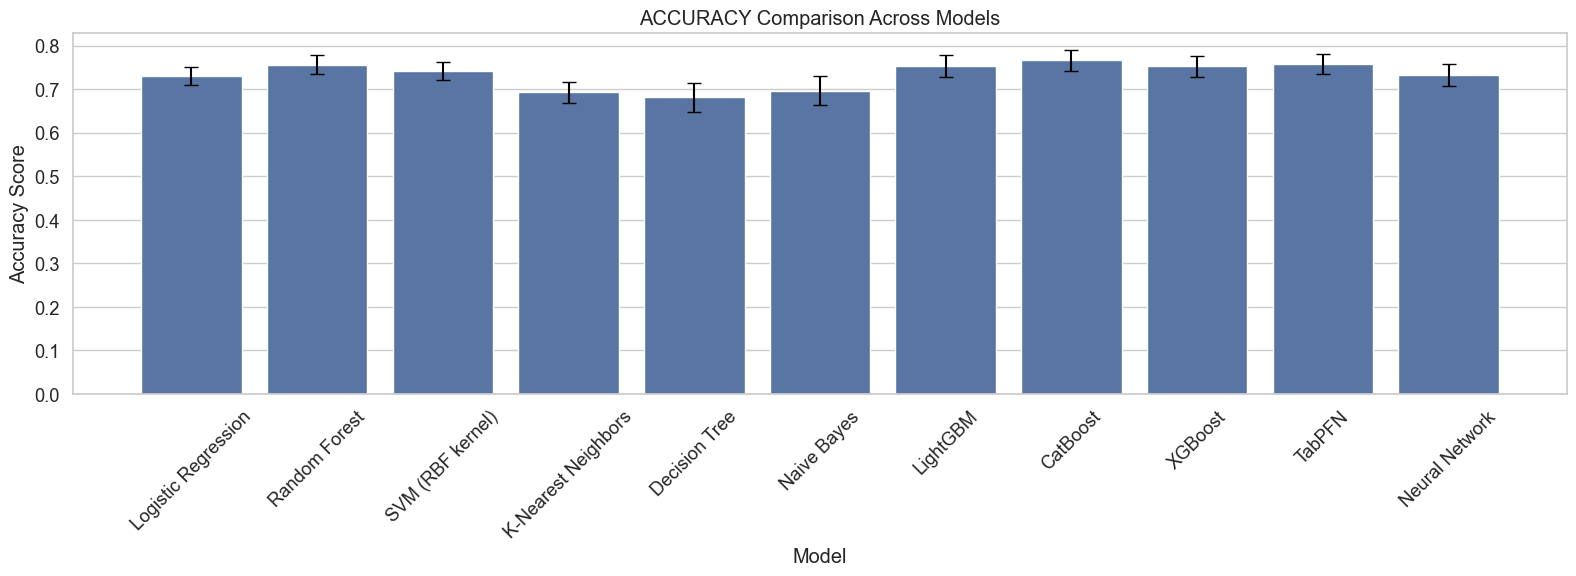

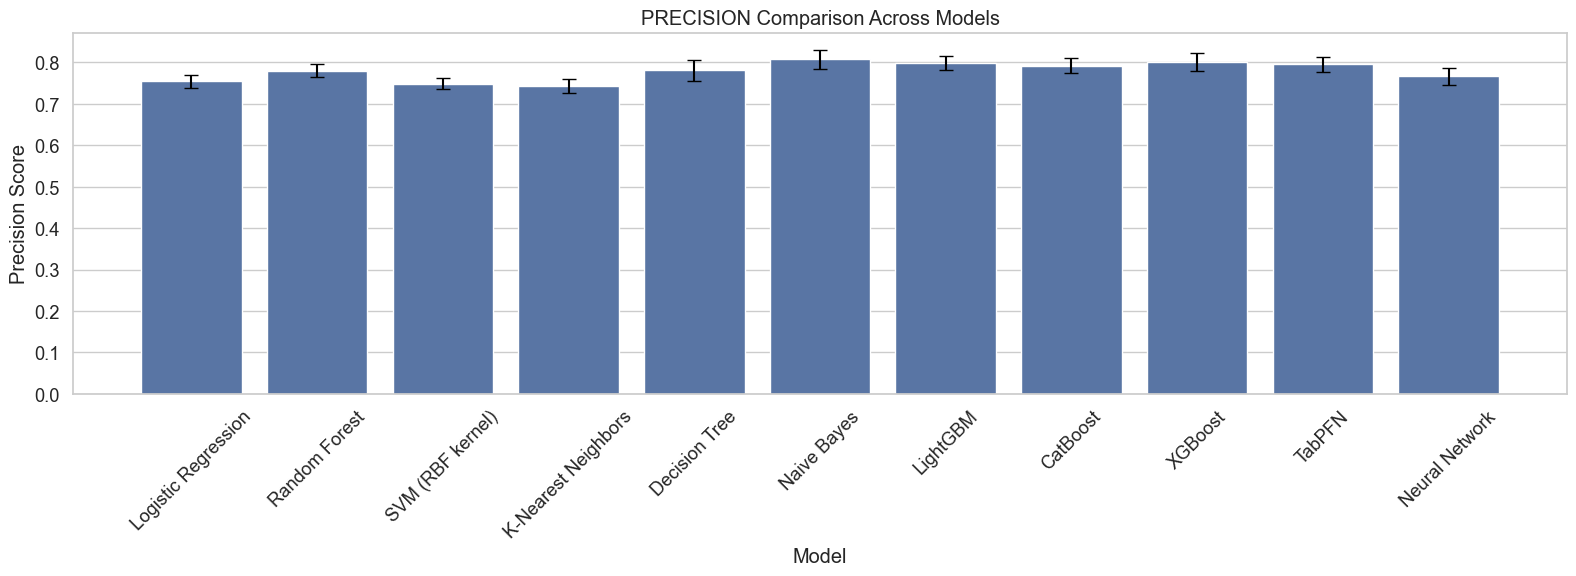

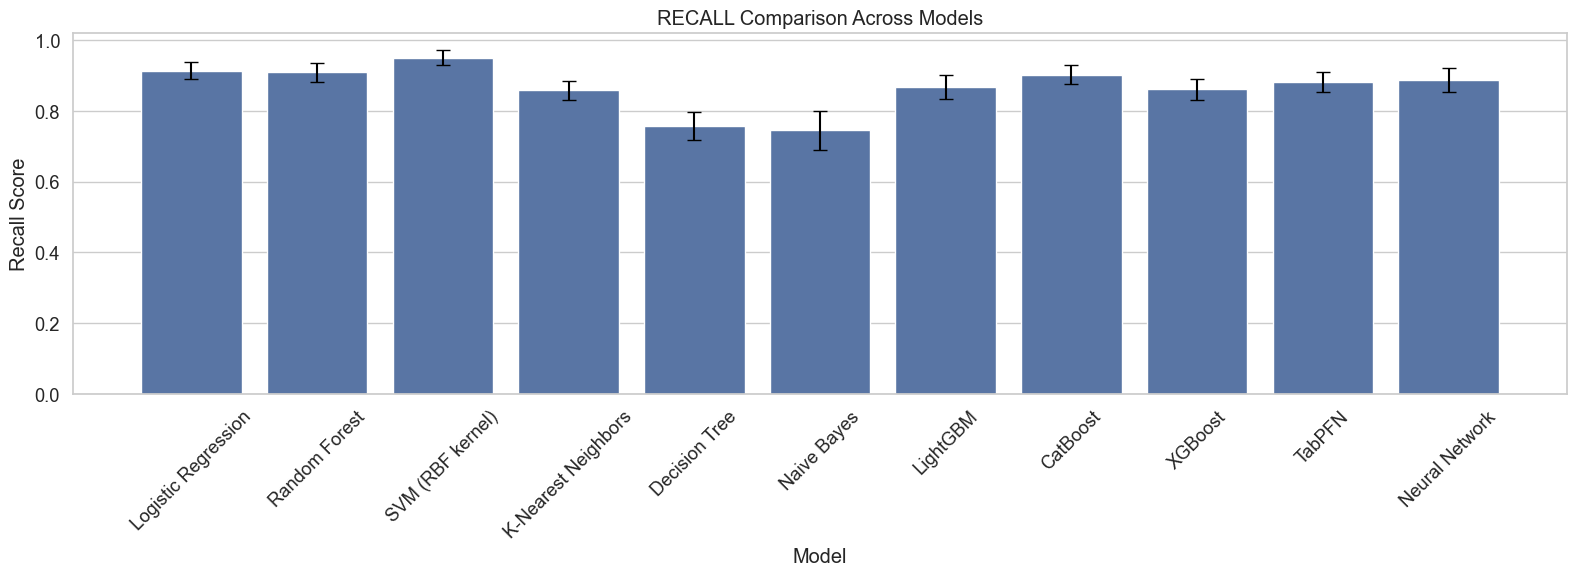

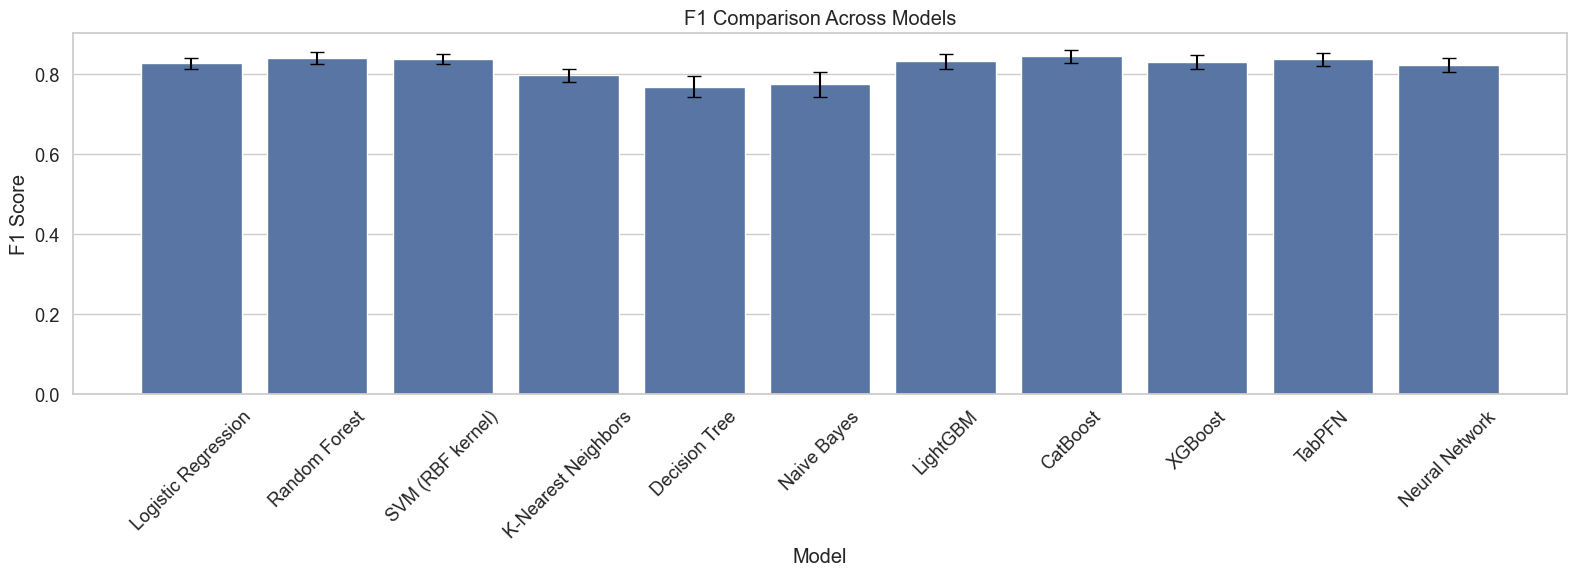

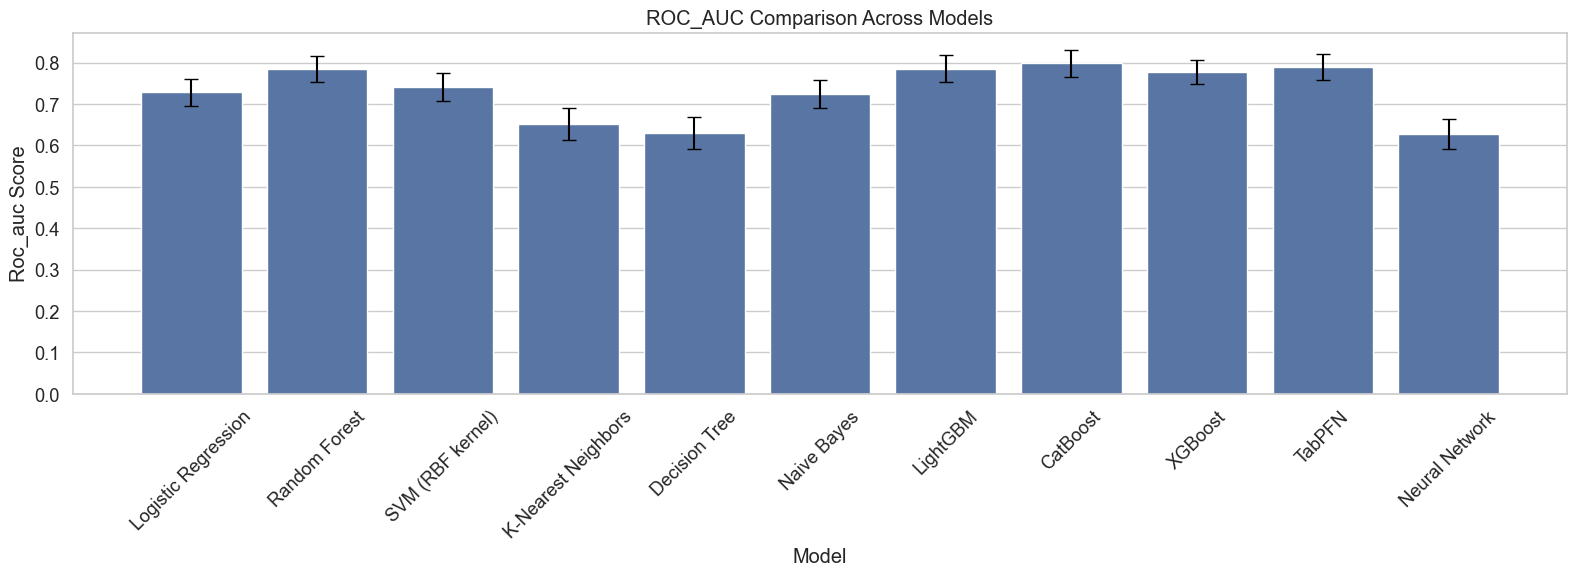

In [46]:
# Run experiments
for i in range(N_RUNS):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=i
    )

    for name, model in models.items():
        if name == 'Neural Network':
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
            _, X_test = min_max_normalization(X_train, X_test)
            X_train, X_val = min_max_normalization(X_train, X_val)
            
            hs = [0, 8, 16, 32, 64]
            hidden_sizes = []
            for i in range(4):
                hsi = study.best_params[f'hs{i}']
                if hsi != 0:
                    hidden_sizes.append(hs[hsi])
            
            act_fun_list = [
                nn.ReLU(),
                nn.LeakyReLU(),
                nn.GELU(),
                nn.ELU(),
                nn.Sigmoid(),
                nn.Tanh(),
                ]
            
            X_test = torch.FloatTensor(X_test)
            y_test = torch.LongTensor(y_test)

            model, train_losses, val_losses = train_model(
                X_train, y_train, X_val, y_val,
                input_size=X_train.shape[1],
                hidden_sizes=hidden_sizes,
                output_size=2,
                optimizer_class=torch.optim.Adam,
                learning_rate=study.best_params['lr'],
                batch_size=study.best_params['batch_size']*8,
                num_epochs=study.best_params['num_epochs'],
                act_fun=act_fun_list[study.best_params['act_fun']],
                dropout_rate=study.best_params['dropout'],
                patience=int(study.best_params['num_epochs']*0.025),
                min_delta=0.001,
                verbose=False,
                )

            y_pred, acc = evaluate_model(model, X_test, y_test)

            results[name]['accuracy'].append(accuracy_score(y_test, y_pred))
            results[name]['precision'].append(precision_score(y_test, y_pred))
            results[name]['recall'].append(recall_score(y_test, y_pred))
            results[name]['f1'].append(f1_score(y_test, y_pred))
            results[name]['roc_auc'].append(roc_auc_score(y_test, y_pred))
        else:
            X_train, X_test = min_max_normalization(X_train, X_test)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

            results[name]['accuracy'].append(accuracy_score(y_test, y_pred))
            results[name]['precision'].append(precision_score(y_test, y_pred))
            results[name]['recall'].append(recall_score(y_test, y_pred))
            results[name]['f1'].append(f1_score(y_test, y_pred))
            results[name]['roc_auc'].append(roc_auc_score(y_test, y_prob))

# Organize results into a DataFrame
summary_data = []
for model, scores in results.items():
    for metric in metrics:
        summary_data.append({
            'Model': model,
            'Metric': metric,
            'Mean': np.mean(scores[metric]),
            'Std': np.std(scores[metric])
        })

summary_df = pd.DataFrame(summary_data)

# Plot each metric
sns.set(style='whitegrid', font_scale=1.2)
for metric in metrics:
    plt.figure(figsize=(16, 6))
    df_plot = summary_df[summary_df['Metric'] == metric]
    sns.barplot(data=df_plot, x='Model', y='Mean', capsize=0.1)
    plt.errorbar(
        x=df_plot['Model'],  # Use index positions for x-coordinates
        y=df_plot["Mean"],
        yerr=df_plot["Std"],
        fmt="none",  # No connecting line
        color="black",  # Error bar color
        capsize=5  # Caps on error bars
    )
    plt.title(f'{metric.upper()} Comparison Across Models')
    plt.ylabel(f'{metric.capitalize()} Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
